Data Preprocessing

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Sales_Data.csv'  
sales_data = pd.read_csv(file_path, encoding='latin1')

# Check data information and describe all columns
print("\nDataset Info:")
sales_data.info()

print("\nStatistical Description (All Columns):")
print(sales_data.describe(include='all'))



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB

Statistical De

In [3]:
# Removing only the 'Status' and 'unnamed1' columns
columns_to_remove = ["Status", "unnamed1"]
sales_data_cleaned = sales_data.drop(columns=columns_to_remove)

In [5]:
print("\nNull Values in Updated Data set:")
print(sales_data_cleaned.isnull().sum())

# Unique values 
print("\nUnique Values in Categorical Columns:")
for col in sales_data.select_dtypes(include=['object']).columns:
    print(f"{col}: {sales_data[col].nunique()} unique values")





Null Values in Updated Data set:
User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

Unique Values in Categorical Columns:
Cust_name: 1250 unique values
Product_ID: 2351 unique values
Gender: 2 unique values
Age Group: 7 unique values
State: 16 unique values
Zone: 5 unique values
Occupation: 15 unique values
Product_Category: 18 unique values


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encoding categorical variables into dummy/indicator variables
sales_data_encoded = pd.get_dummies(sales_data_cleaned, drop_first=True)

# Handling missing values in the target column 'Amount'
sales_data_encoded["Amount"] = sales_data_encoded["Amount"].fillna(sales_data_encoded["Amount"].median())

# Splitting features 
X = sales_data_encoded.drop(columns=["Amount"])
y = sales_data_encoded["Amount"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
pd.isnull(sales_data_cleaned).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
sales_data_cleaned.describe()

User_ID           Age  Marital_Status        Orders        Amount
count  1.125100e+04  11251.000000    11251.000000  11251.000000  11239.000000
mean   1.003004e+06     35.421207        0.420318      2.489290   9453.610858
std    1.716125e+03     12.754122        0.493632      1.115047   5222.355869
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000        0.000000      1.500000   5443.000000
50%    1.003065e+06     33.000000        0.000000      2.000000   8109.000000
75%    1.004430e+06     43.000000        1.000000      3.000000  12675.000000
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000

Data Vizualization for Sales Data

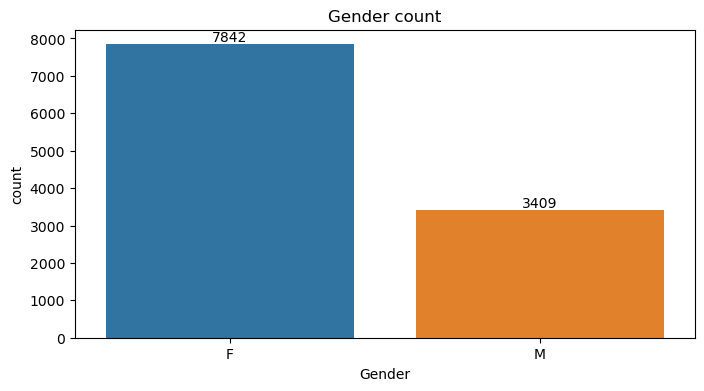

In [8]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8,4))
plt.title ("Gender count")
ab = sns.countplot(x = 'Gender', data = sales_data_cleaned, hue='Gender')
for bars in ab.containers:
    ab.bar_label(bars)    
plt.savefig("Gender_count.jpg")
plt.show()


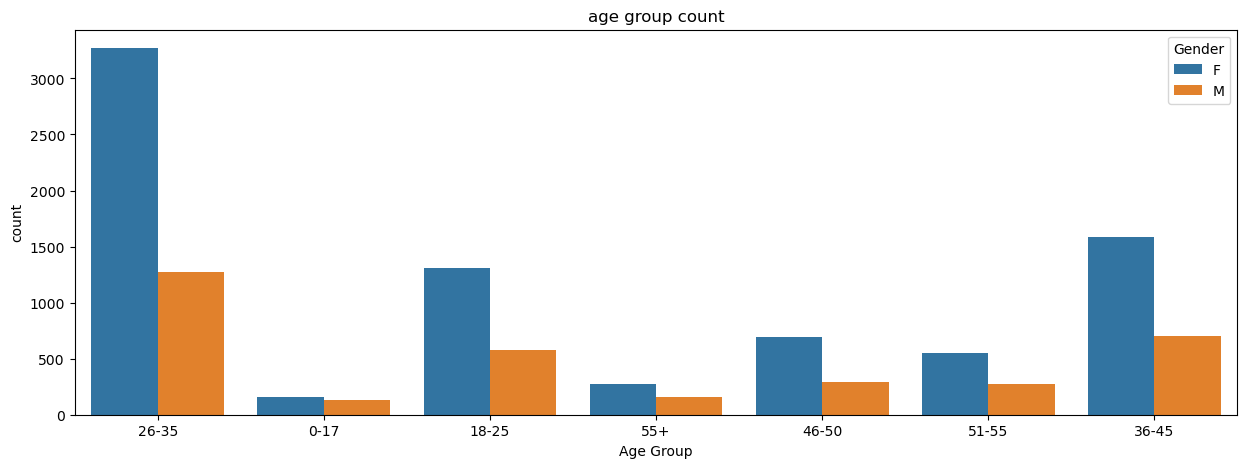

In [9]:
plt.figure(figsize=(15,5))
plt.title ("age group count")
plt.savefig("age_group_count.jpg")
sns.countplot(data = sales_data_cleaned, x = 'Age Group', hue= 'Gender')
plt.show()

In [10]:
sales_data_cleaned['Marital_Status'].unique()
sales_data_cleaned['Marital_Status']= sales_data_cleaned['Marital_Status'].replace(0, "single")
sales_data_cleaned['Marital_Status']= sales_data_cleaned['Marital_Status'].replace(1, "married")

sales_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  object 
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


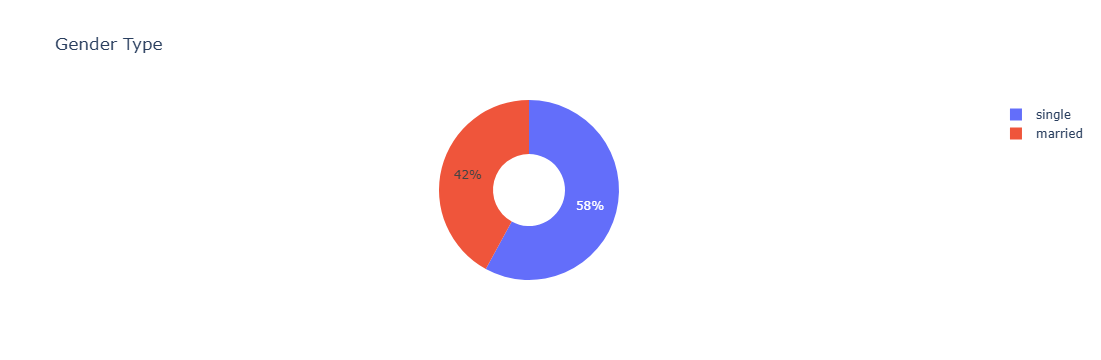

<Figure size 4000x500 with 0 Axes>

In [11]:
import plotly.express as px


plt.figure(figsize=(40,5))
type=sales_data_cleaned['Marital_Status'].value_counts()
transactions=type.index
quantity=type.values
plt.savefig("marital_status.jpg")
px.pie(sales_data_cleaned,values=quantity,names=transactions,hole=0.4,title="Gender Type")

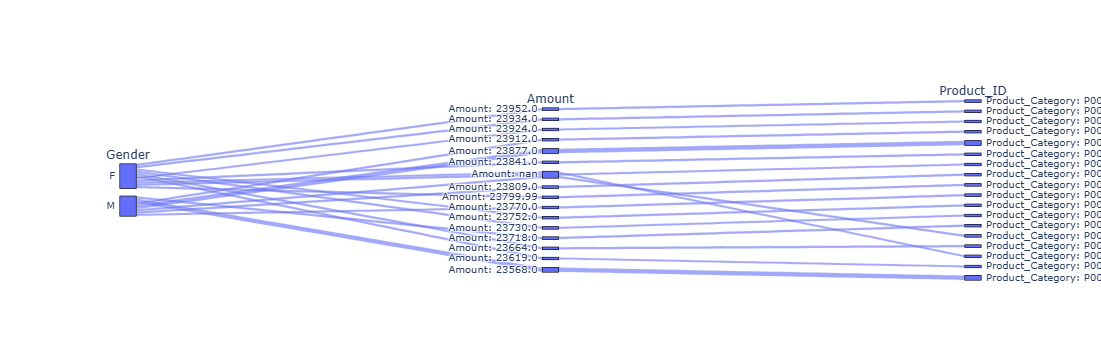

<Figure size 640x480 with 0 Axes>

In [12]:
import plotly.graph_objects as go

df_sliced = sales_data_cleaned.head(20)
plt.savefig("gender_productid")

# Now, use 'df_sliced' for creating the parallel categories plot
fig = go.Figure(data=go.Parcats(
    dimensions=list([
        dict(label='Gender', values=df_sliced['Gender']),
        dict(label='Amount', values=df_sliced['Amount'].apply(lambda x: f'Amount: {x}')),
        dict(label='Product_ID', values=df_sliced['Product_ID'].apply(lambda x: f'Product_Category: {x}'))
    ])
))

fig.show()

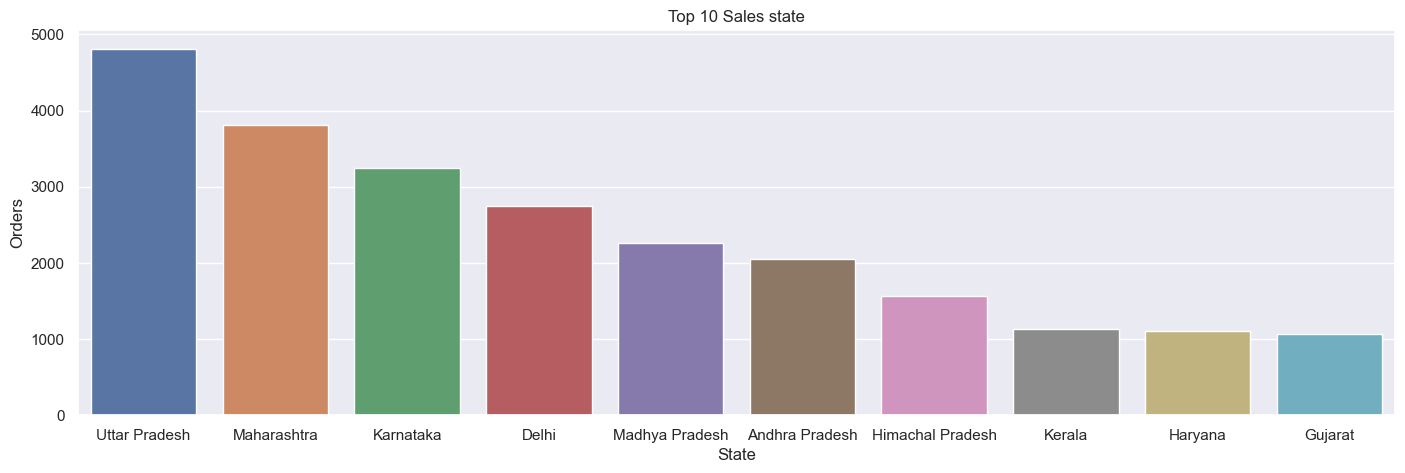

In [13]:
# total number of orders from top 10 states


sales_state = sales_data_cleaned.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', hue = 'State')

plt.title ("Top 10 Sales state")
plt.savefig("Top10_sales_state")


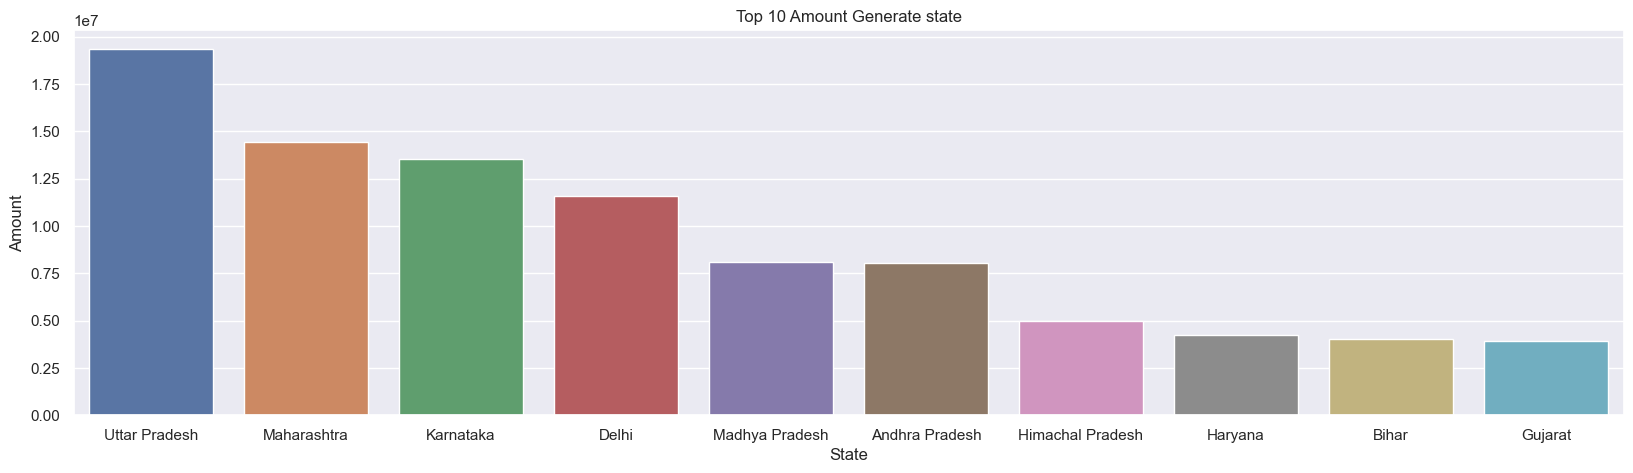

In [14]:
sales_state = sales_data_cleaned.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', hue = 'State')

plt.title ("Top 10 Amount Generate state")
plt.savefig("Top10_Amountgenerate_state")

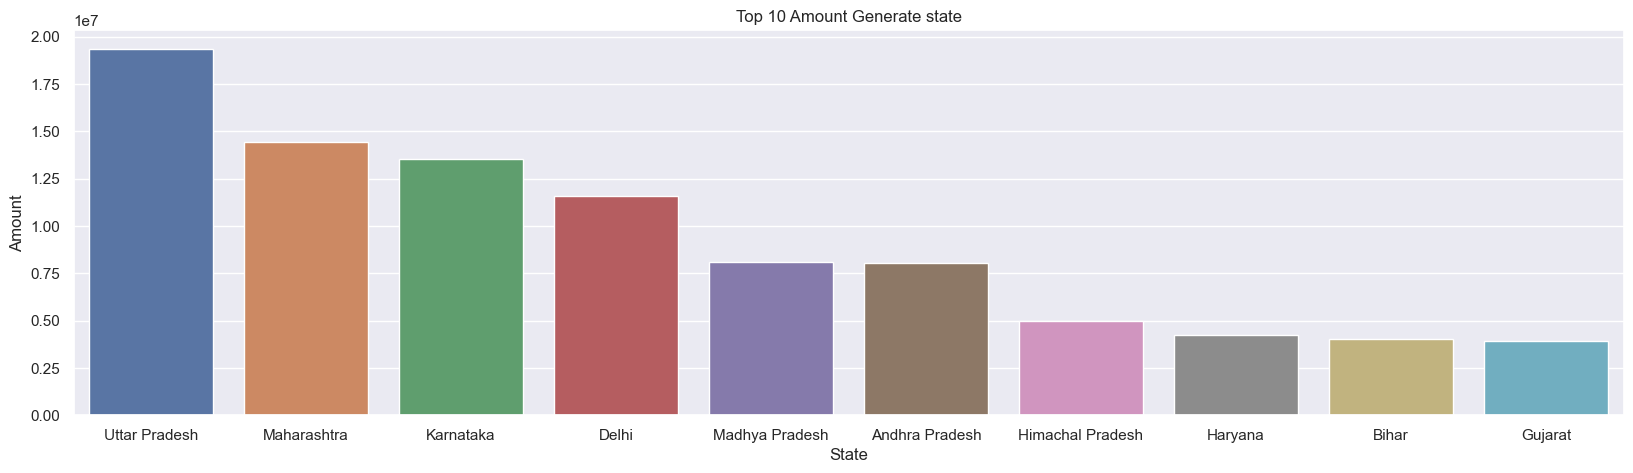

In [15]:
sales_state = sales_data_cleaned.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', hue = 'State')

plt.title ("Top 10 Amount Generate state")
plt.savefig("Top10_Amountgenerate_state")

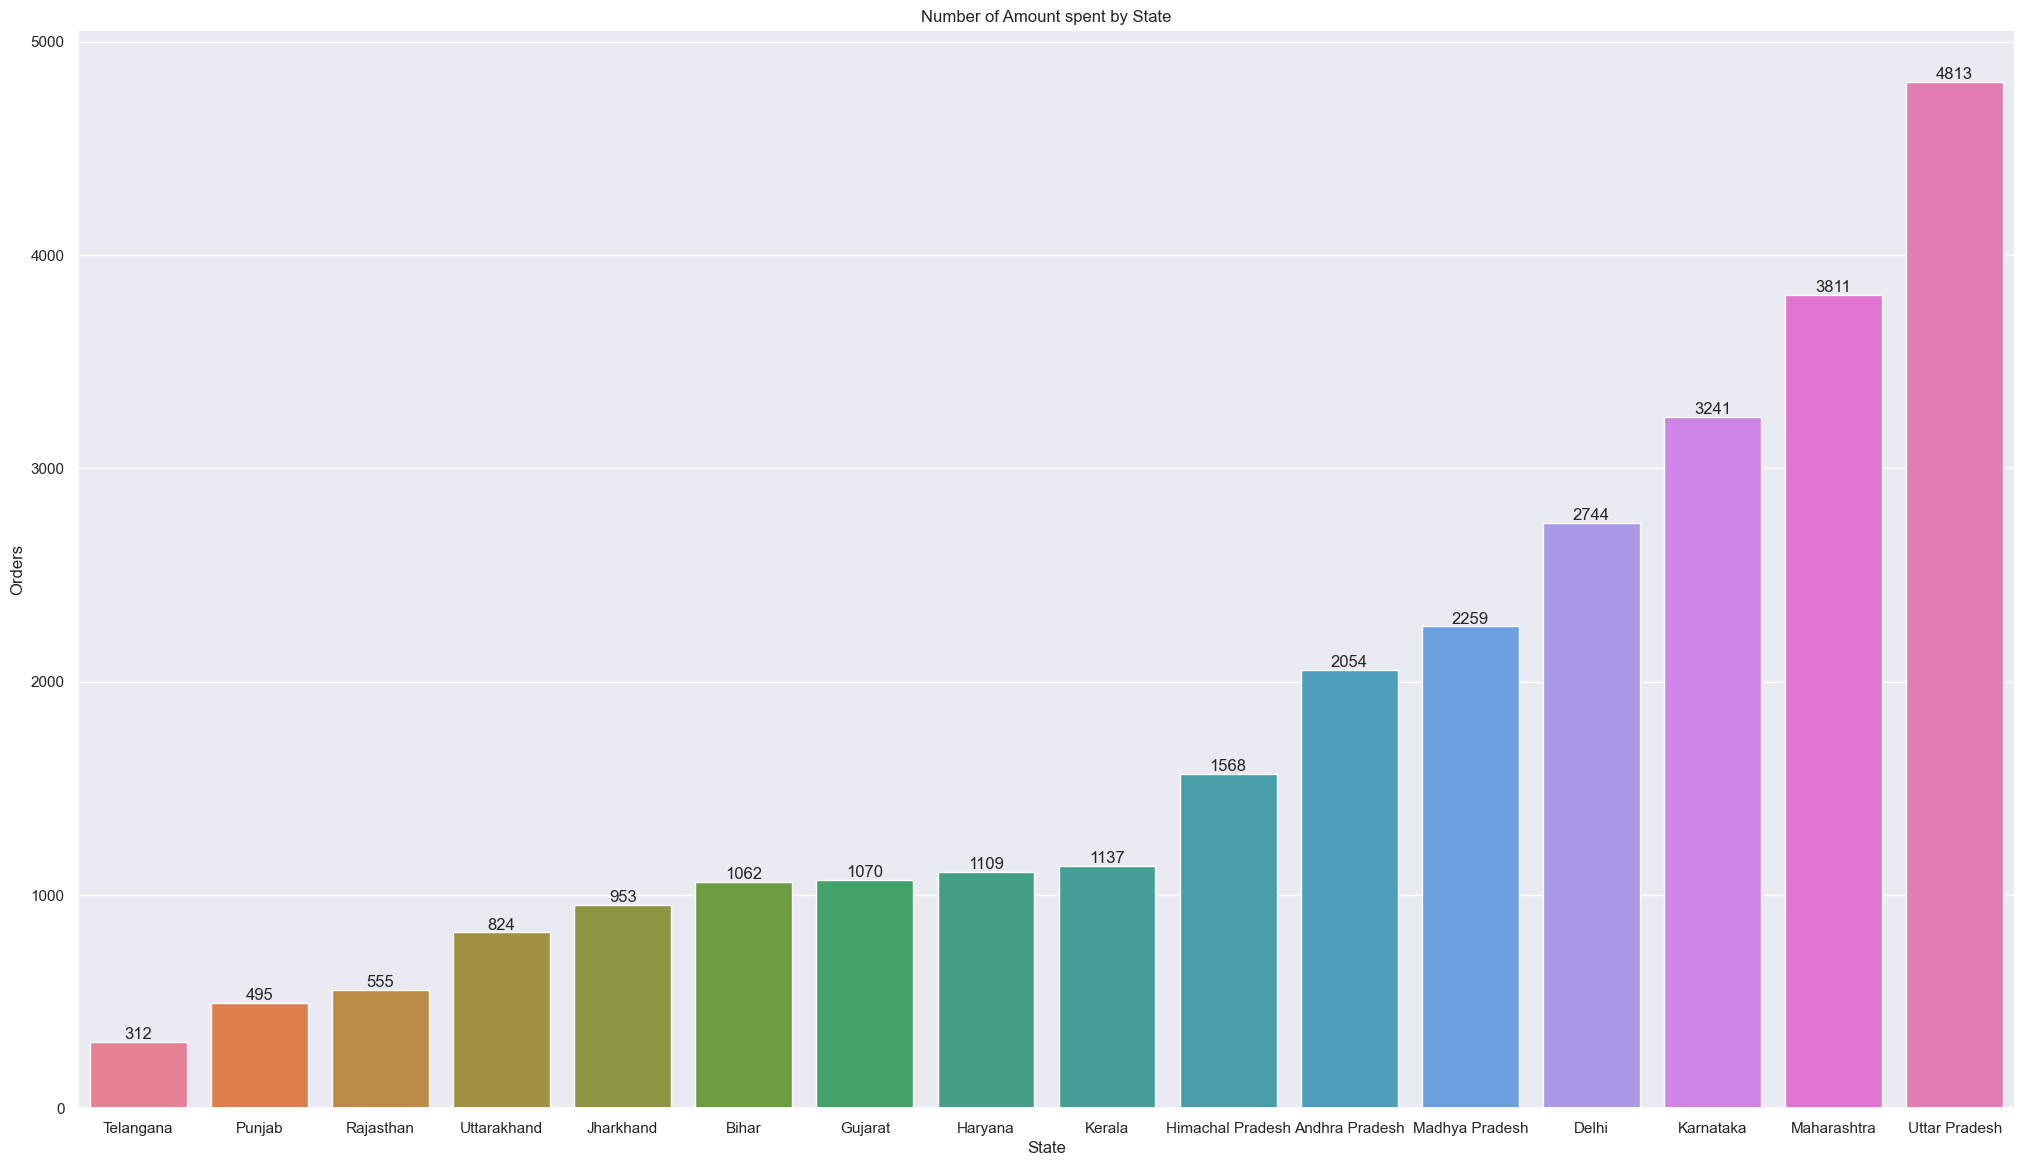

In [16]:
# total amount/sales from top 10 states
Stateorder= sales_data_cleaned.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=True)

plt.figure(figsize=(25,14))
ab= sns.barplot(x='State',y='Orders',data=Stateorder, estimator='sum', hue = 'State')
for barh in ab.containers:
    ab.bar_label(barh)
    plt.title ("Number of Amount spent by State")
    plt.savefig("all_state_order")


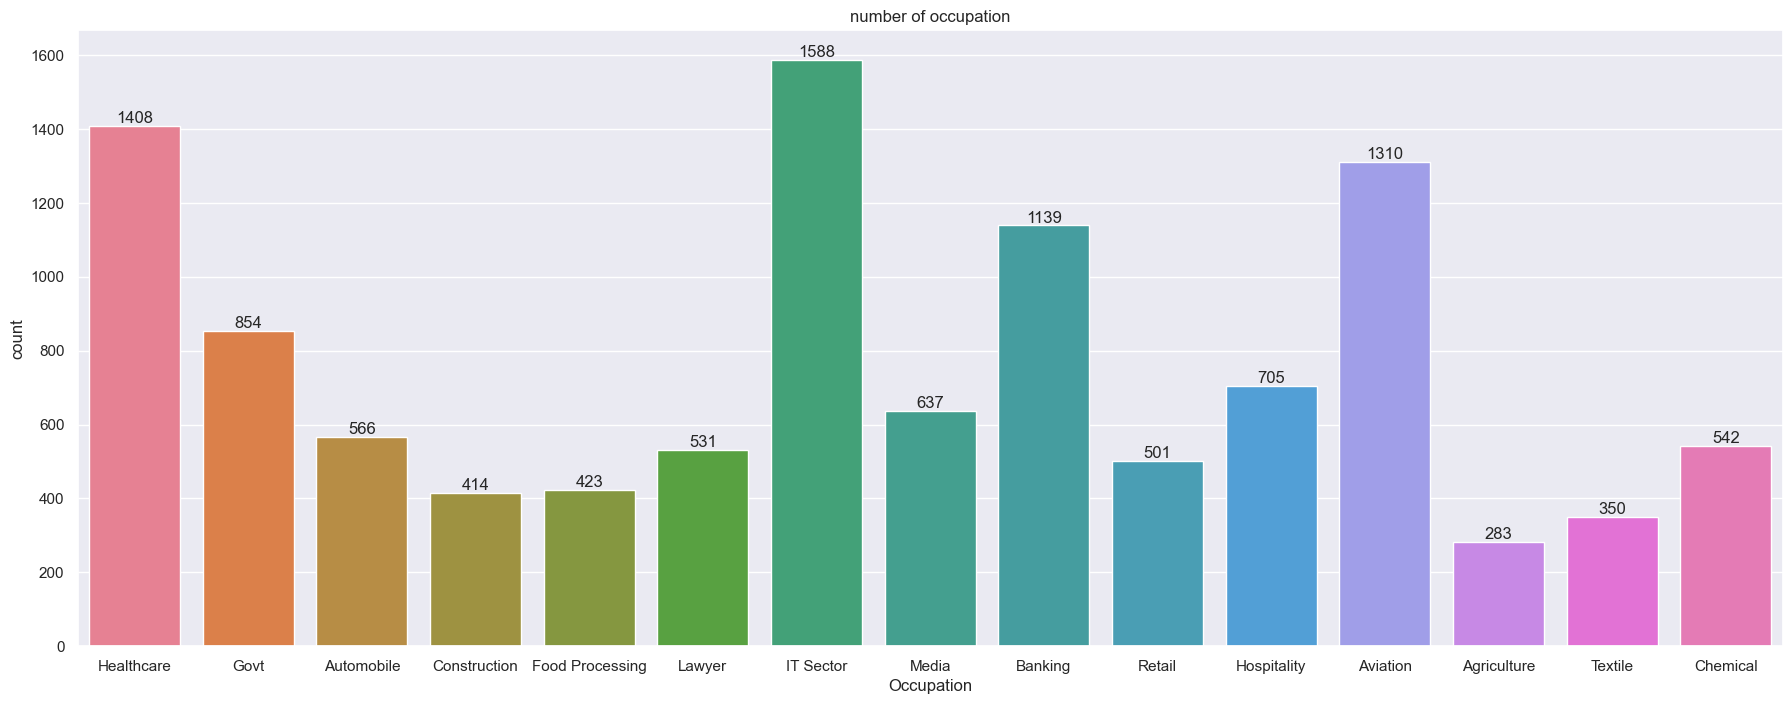

In [17]:
sns.set(rc={'figure.figsize':(22,8)})
ax = sns.countplot(data = sales_data_cleaned, x = 'Occupation', hue = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
    plt.title ("number of occupation")
    plt.savefig("occupationtype")


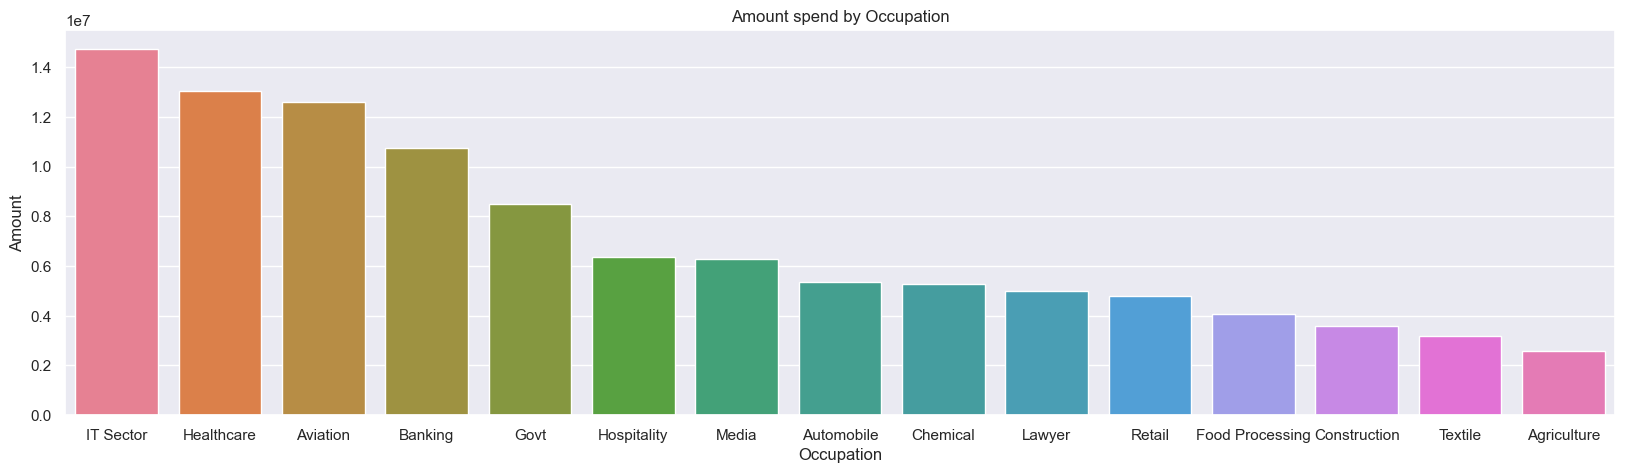

In [18]:
occupation_spendamount = sales_data_cleaned.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = occupation_spendamount, x = 'Occupation',y= 'Amount', hue = 'Occupation')
plt.title ("Amount spend by Occupation")
plt.savefig("Amount_spend_by_ occupationtype")

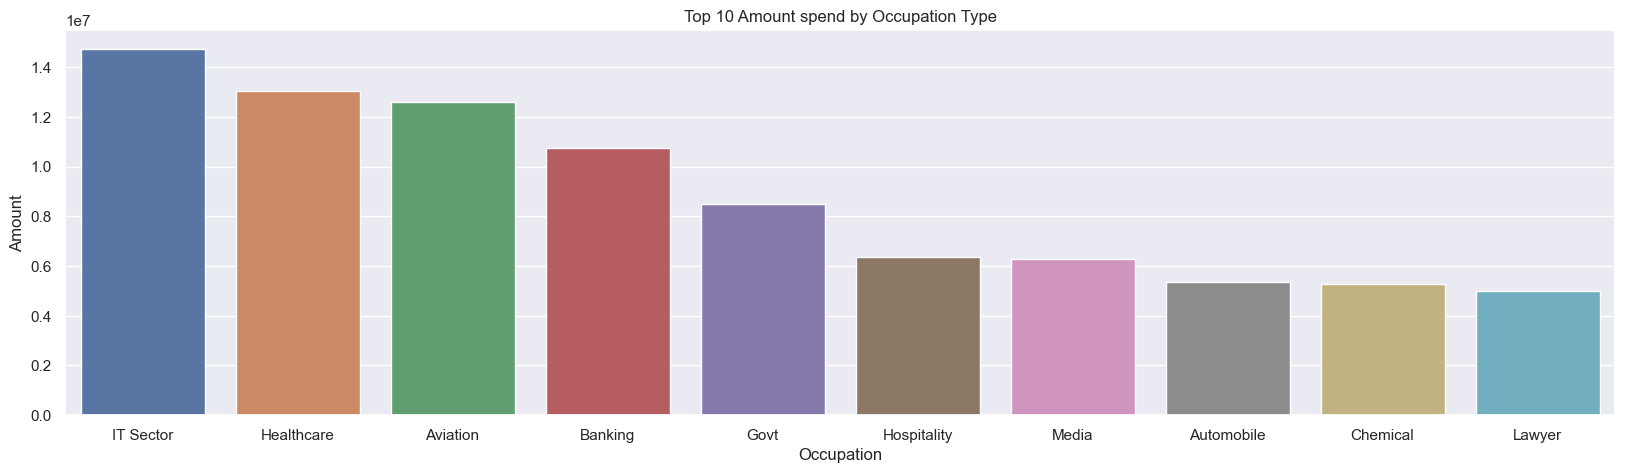

In [19]:
top10occupation_spendamount = sales_data_cleaned.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', 
                                                                                                     ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = top10occupation_spendamount, x = 'Occupation',y= 'Amount', hue = 'Occupation')
plt.title ("Top 10 Amount spend by Occupation Type")
plt.savefig("Top 10 Amount spend by Occupation Type")

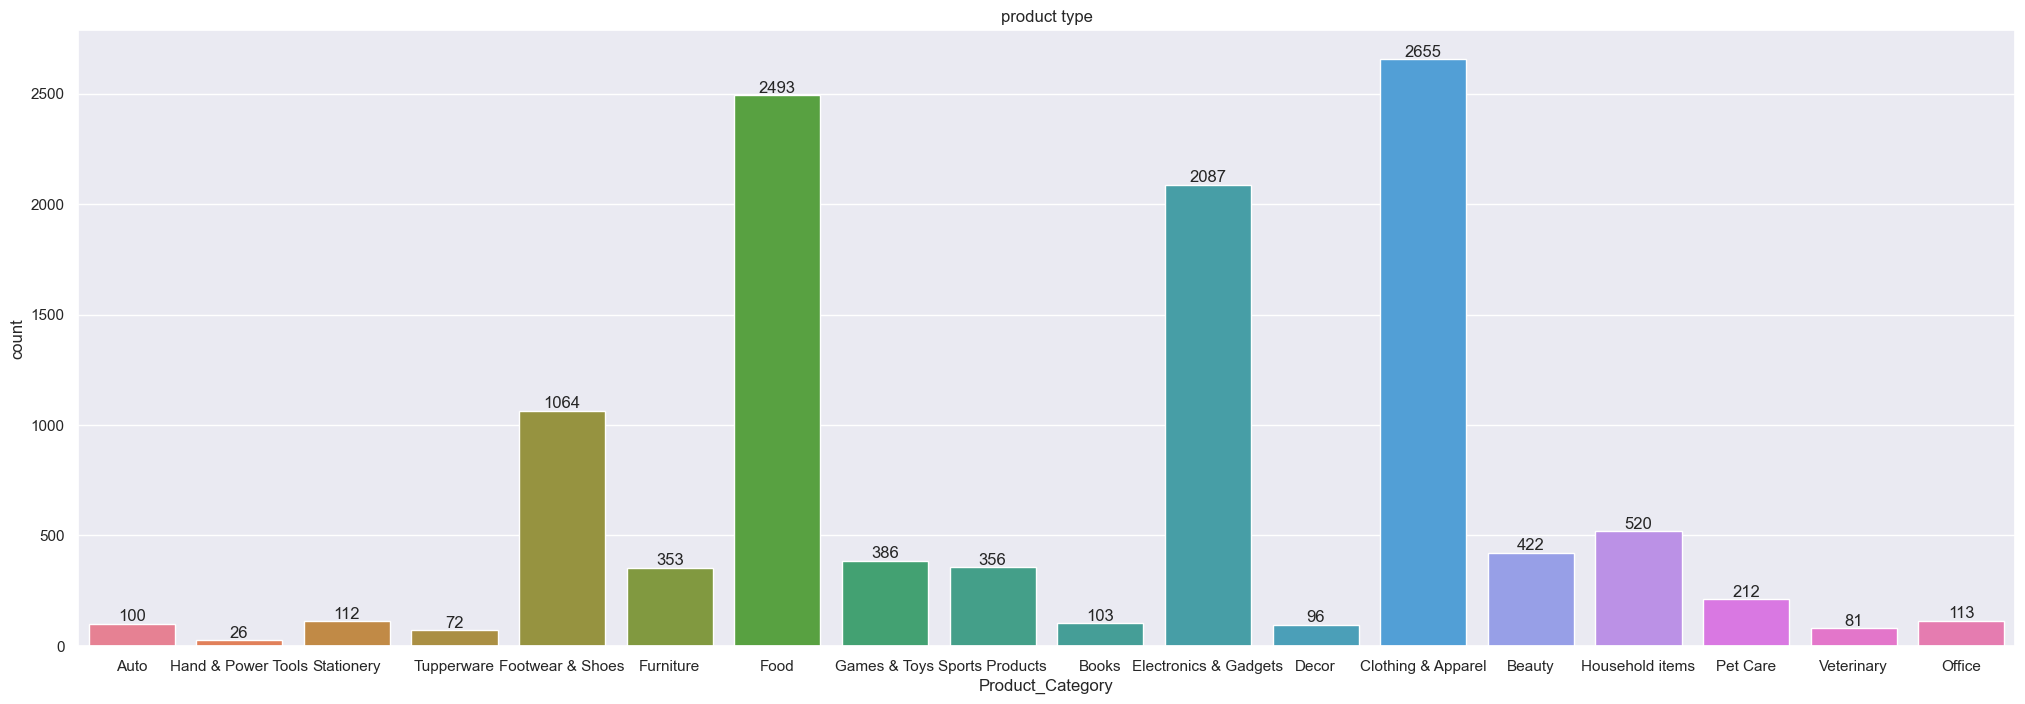

In [20]:
sns.set(rc={'figure.figsize':(25,8)})

ax = sns.countplot(data = sales_data_cleaned, x = 'Product_Category', hue = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
    plt.title ("product type")
    plt.savefig("Product_type")
    

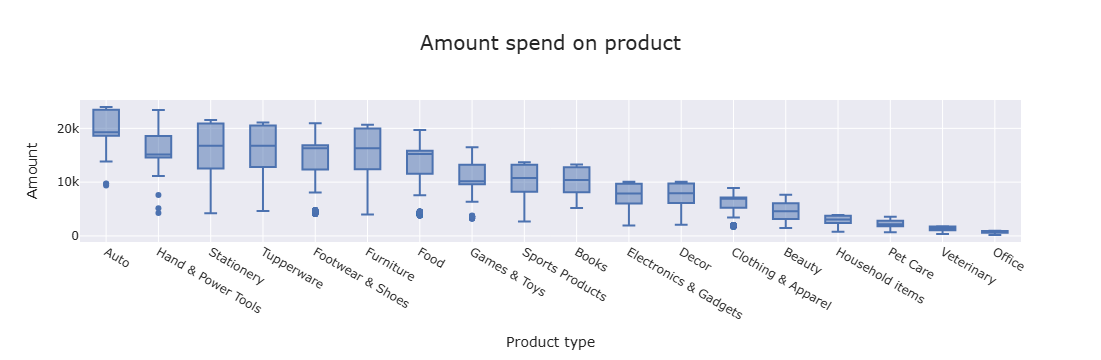

<Figure size 2500x800 with 0 Axes>

In [21]:

fig = go.Figure(data=[go.Box(y=sales_data_cleaned['Amount'], x=sales_data_cleaned['Product_Category'])])
fig.update_layout(
    title=dict(text="Amount spend on product", font=dict(size=20)),
    xaxis_title="Product type",
    yaxis_title="Amount",
    template="seaborn"

)
plt.savefig("product with amount")
fig.show()



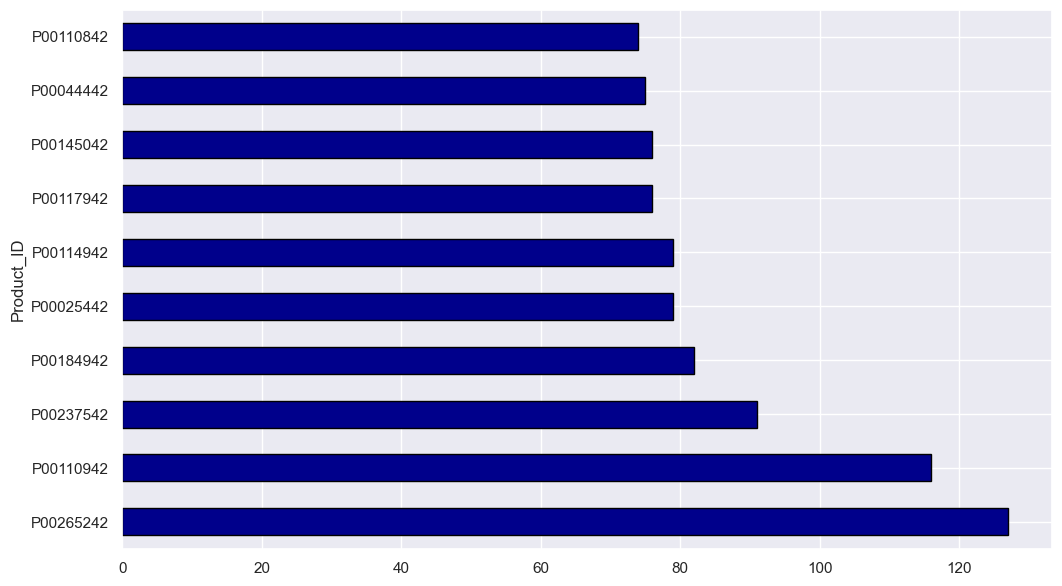

In [22]:
# top 10 most sold products (same thing as above)
fig1, ax1 = plt.subplots(figsize=(12,7))
sales_data_cleaned.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='barh', ax=ax1, color='darkblue', edgecolor='black')
plt.savefig("productid with order")


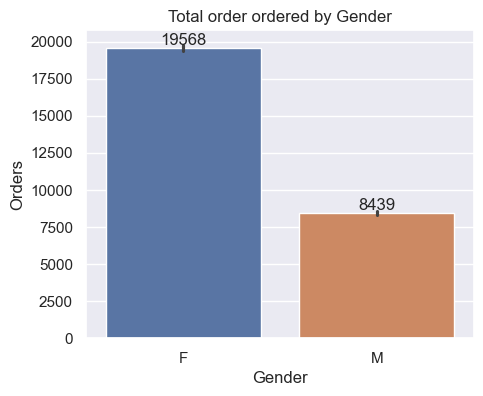

In [23]:
# total amount/sales from top 10 states
plt.figure(figsize=(5,4))
ab= sns.barplot(x='Gender',y='Orders',data=sales_data_cleaned, estimator='sum', hue = 'Gender')


for barh in ab.containers:
    
    ab.bar_label(barh)
plt.title ("Total order ordered by Gender")
plt.savefig("Odred by gender")


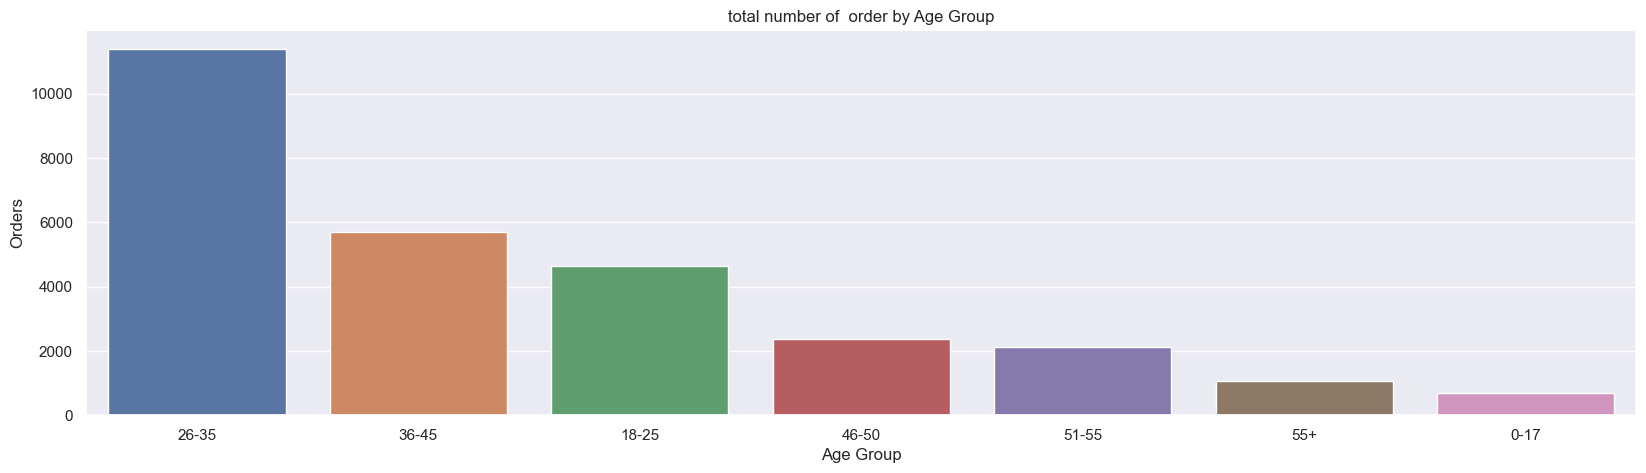

In [24]:
Gender_order = sales_data_cleaned.groupby(['Age Group'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = Gender_order, x = 'Age Group',y= 'Orders', hue='Age Group' )
plt.title("total number of  order by Age Group")
plt.savefig("Odred by Agegroup")

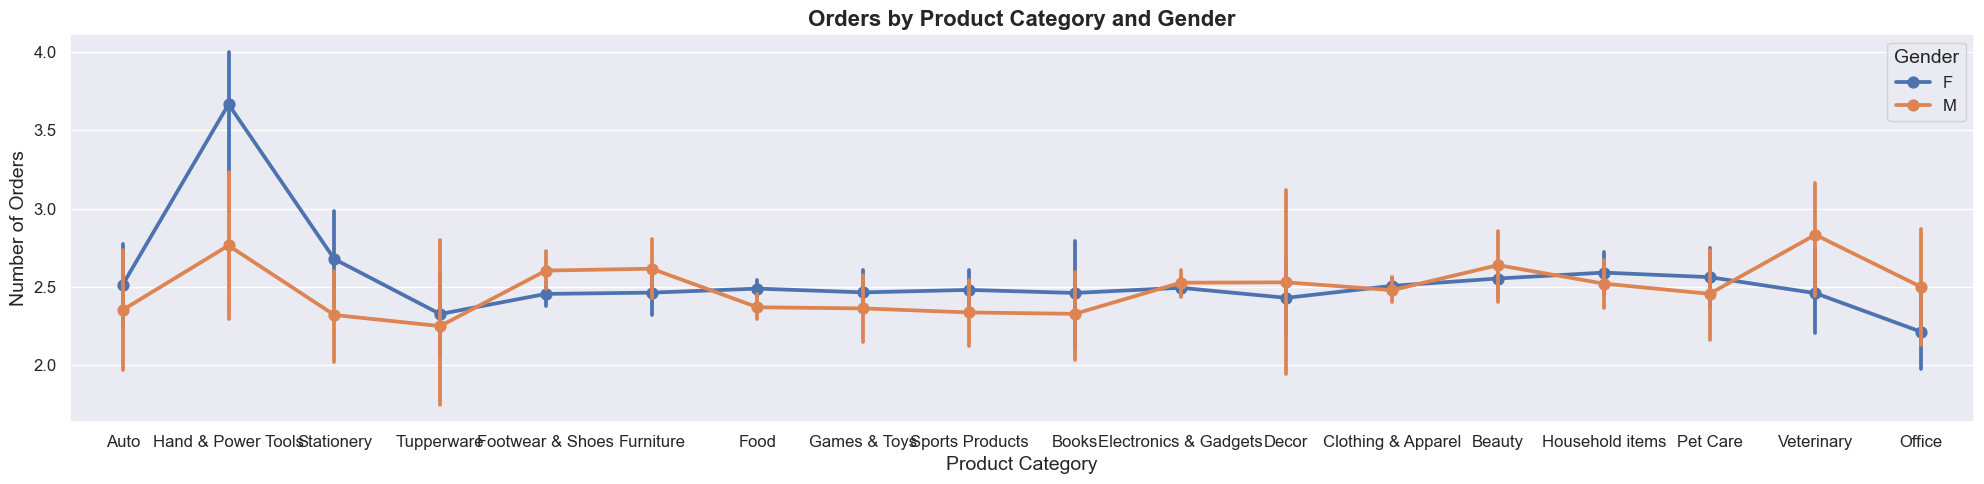

In [25]:

sns.pointplot(data=sales_data_cleaned, x="Product_Category", y="Orders", hue="Gender")

plt.title("Orders by Product Category and Gender", fontsize=16, fontweight='bold')
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Gender", fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.savefig("order+gender+pc.png", dpi=300)
plt.show()

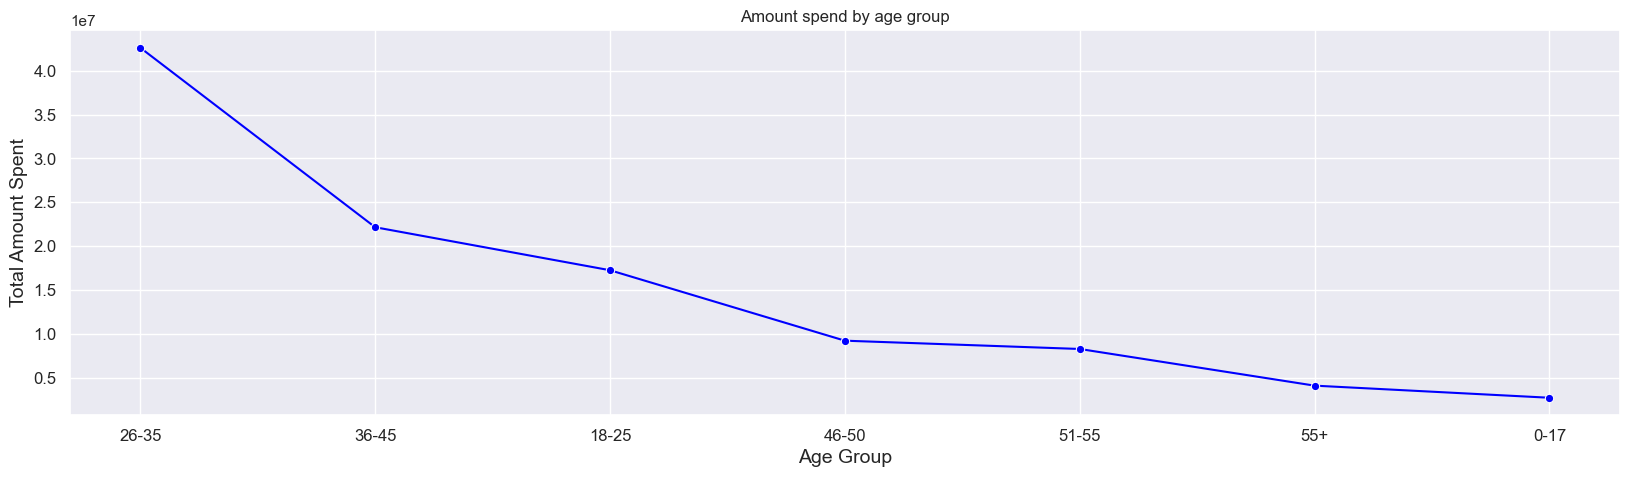

In [26]:
Gender_or = sales_data_cleaned.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)


agegroupamount= sns.lineplot(
    data=Gender_or,
    x="Age Group", 
    y="Amount",
    markers=True,
    marker="o",
    color="blue"
)
agegroupamount.set_title( "Amount spend by age group")
agegroupamount.set_xlabel("Age Group", fontsize=14)
agegroupamount.set_ylabel("Total Amount Spent", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Amount spend by age group.png") 

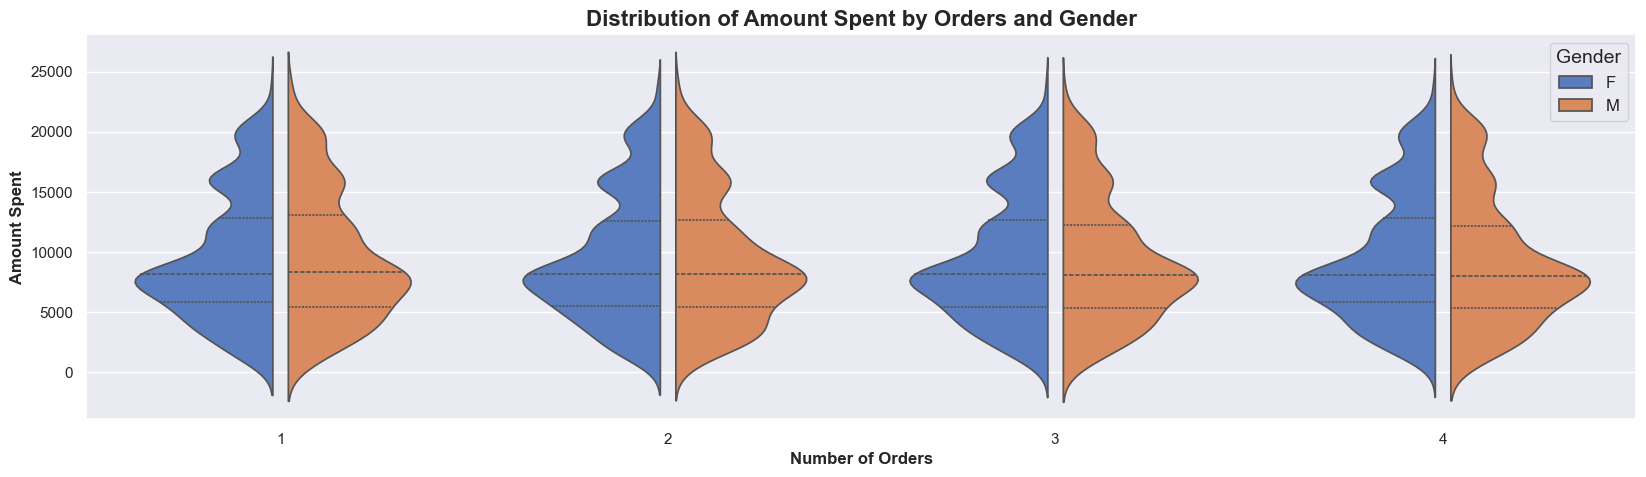

In [27]:

sns.violinplot(data=sales_data_cleaned, x="Orders", y="Amount", hue="Gender", split=True, gap=.1, inner="quart", palette="muted")
plt.title('Distribution of Amount Spent by Orders and Gender', fontsize=16, fontweight='bold')
plt.xlabel('Number of Orders', fontweight='bold')
plt.ylabel('Amount Spent', fontweight='bold')
plt.legend(title='Gender', fontsize=12, title_fontsize=14)


In [11]:
# Aggregation 
print("\nTop 5 States by Sales Amount:")
if 'State' in sales_data.columns and 'Amount' in sales_data.columns:
    print(sales_data.groupby("State")["Amount"].sum().sort_values(ascending=False).head())

# Proceed with preprocessing only after analysis

sales_data_cleaned = sales_data.drop(columns=["User_ID", "Cust_name", "Product_ID", "Status", "unnamed1"])
sales_data_encoded = pd.get_dummies(sales_data_cleaned, drop_first=True)
sales_data_encoded["Amount"] = sales_data_encoded["Amount"].fillna(sales_data_encoded["Amount"].median())


Top 5 States by Sales Amount:
State
Uttar Pradesh     19374968.00
Maharashtra       14427543.00
Karnataka         13523540.00
Delhi             11603819.45
Madhya Pradesh     8101142.00
Name: Amount, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_2076\811172136.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




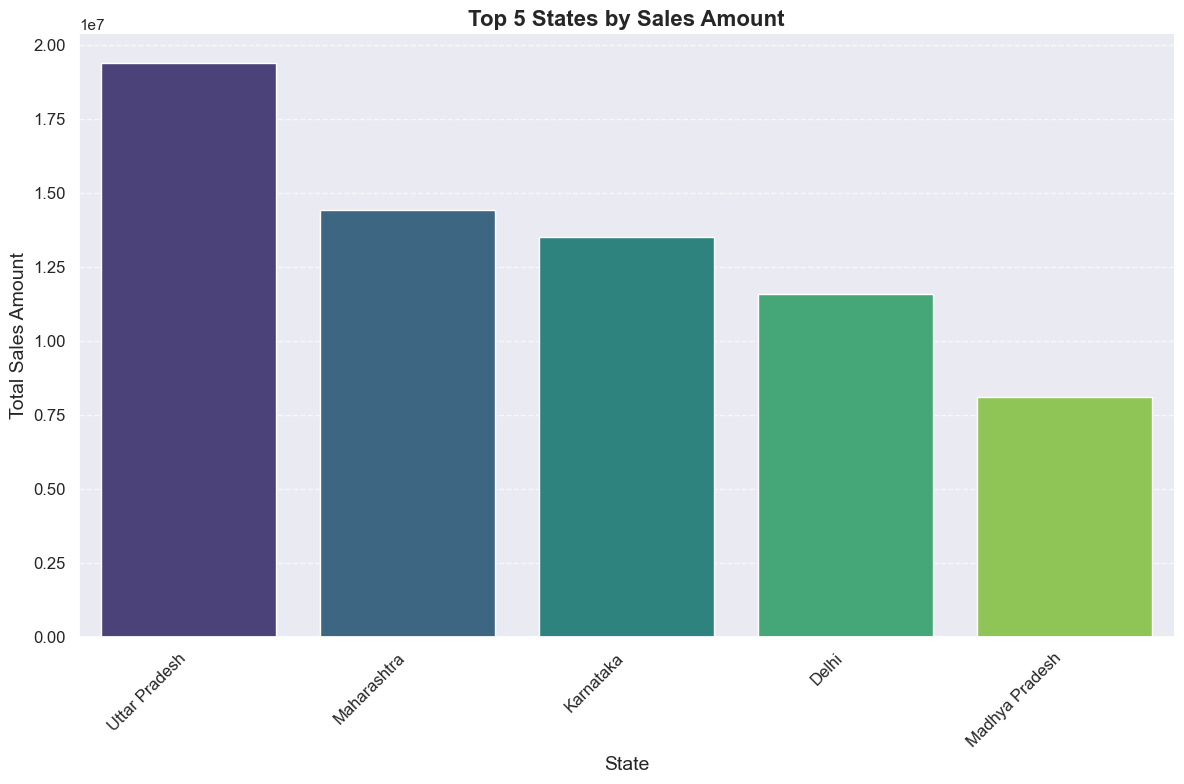

In [29]:
# Aggregation for top 5 states by sales amount
top_states_sales = sales_data_cleaned.groupby("State")["Amount"].sum().sort_values(ascending=False).head()

plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_states_sales.index,
    y=top_states_sales.values,
    palette="viridis"
)
plt.title("Top 5 States by Sales Amount", fontsize=16, fontweight="bold")
plt.xlabel("State", fontsize=14)
plt.ylabel("Total Sales Amount", fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encoding categorical variables into dummy variables
sales_data_encoded = pd.get_dummies(sales_data_cleaned, drop_first=True)

sales_data_encoded["Amount"] = sales_data_encoded["Amount"].fillna(sales_data_encoded["Amount"].median())

X = sales_data_encoded.drop(columns=["Amount"])
y = sales_data_encoded["Amount"]

# Scaling features for ANN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Training and Evaluating Models

Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

# Evaluate Multiple Linear Regression
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("Multiple Linear Regression Performance:")
print(f"R²: {linear_r2:.2f}, MAE: {linear_mae:.2f}, RMSE: {linear_rmse:.2f}")


Multiple Linear Regression Performance:
R²: 0.65, MAE: 2369.50, RMSE: 3134.18


In [63]:
# Check alignment of coefficients and features
linear_coefficients = linear_model.coef_
encoded_column_names = X.columns  # Feature names after encoding

# Ensure number of coefficients matches number of features
if len(linear_coefficients) != len(encoded_column_names):
    raise ValueError(
        f"Mismatch: {len(linear_coefficients)} coefficients and {len(encoded_column_names)} features."
    )
print("Coefficients align with features.")

# Ensure the target column 'Amount' is excluded from features
if "Amount" in encoded_column_names:
    raise ValueError("Target column 'Amount' should not be included in features!")
print("Target column 'Amount' is excluded from features.")

Coefficients align with features.
Target column 'Amount' is excluded from features.


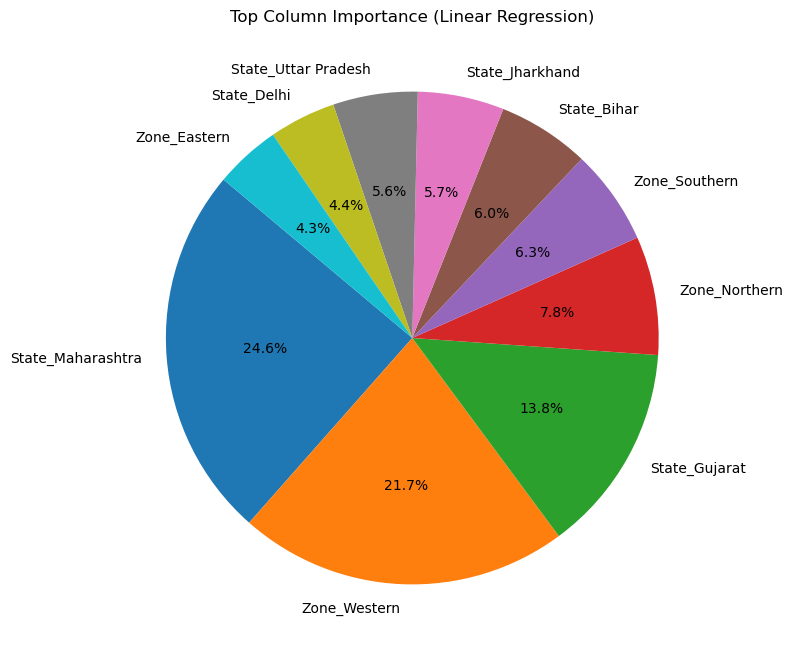

In [65]:
import matplotlib.pyplot as plt

# Extract column names after encoding
encoded_column_names = X.columns if isinstance(X, pd.DataFrame) else sales_data_encoded.drop(columns=["Amount"]).columns

# Ensure lengths of coefficients and encoded column names match
if len(linear_coefficients) != len(encoded_column_names):
    raise ValueError(
        f"Mismatch: linear_coefficients ({len(linear_coefficients)}) and encoded_column_names ({len(encoded_column_names)}) lengths."
        " Ensure coefficients correspond to the encoded columns."
    )

encoded_column_names = np.array(encoded_column_names)


abs_coefficients = np.abs(linear_coefficients)
sorted_indices = np.argsort(abs_coefficients)[::-1]  
sorted_abs_coefficients = abs_coefficients[sorted_indices]  
sorted_column_names = encoded_column_names[sorted_indices]  

top_n = min(10, len(sorted_abs_coefficients))
top_columns = sorted_column_names[:top_n]
top_coefficients = sorted_abs_coefficients[:top_n]

plt.figure(figsize=(10, 8))
plt.pie(top_coefficients, labels=top_columns, autopct='%1.1f%%', startangle=140)
plt.title("Top Column Importance (Linear Regression)")
plt.show()



Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

# Evaluate Random Forest
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("\nRandom Forest Performance:")
print(f"R²: {rf_r2:.2f}, MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}")




Random Forest Performance:
R²: 0.54, MAE: 2597.29, RMSE: 3556.56


Feature Importance (Random Forest)


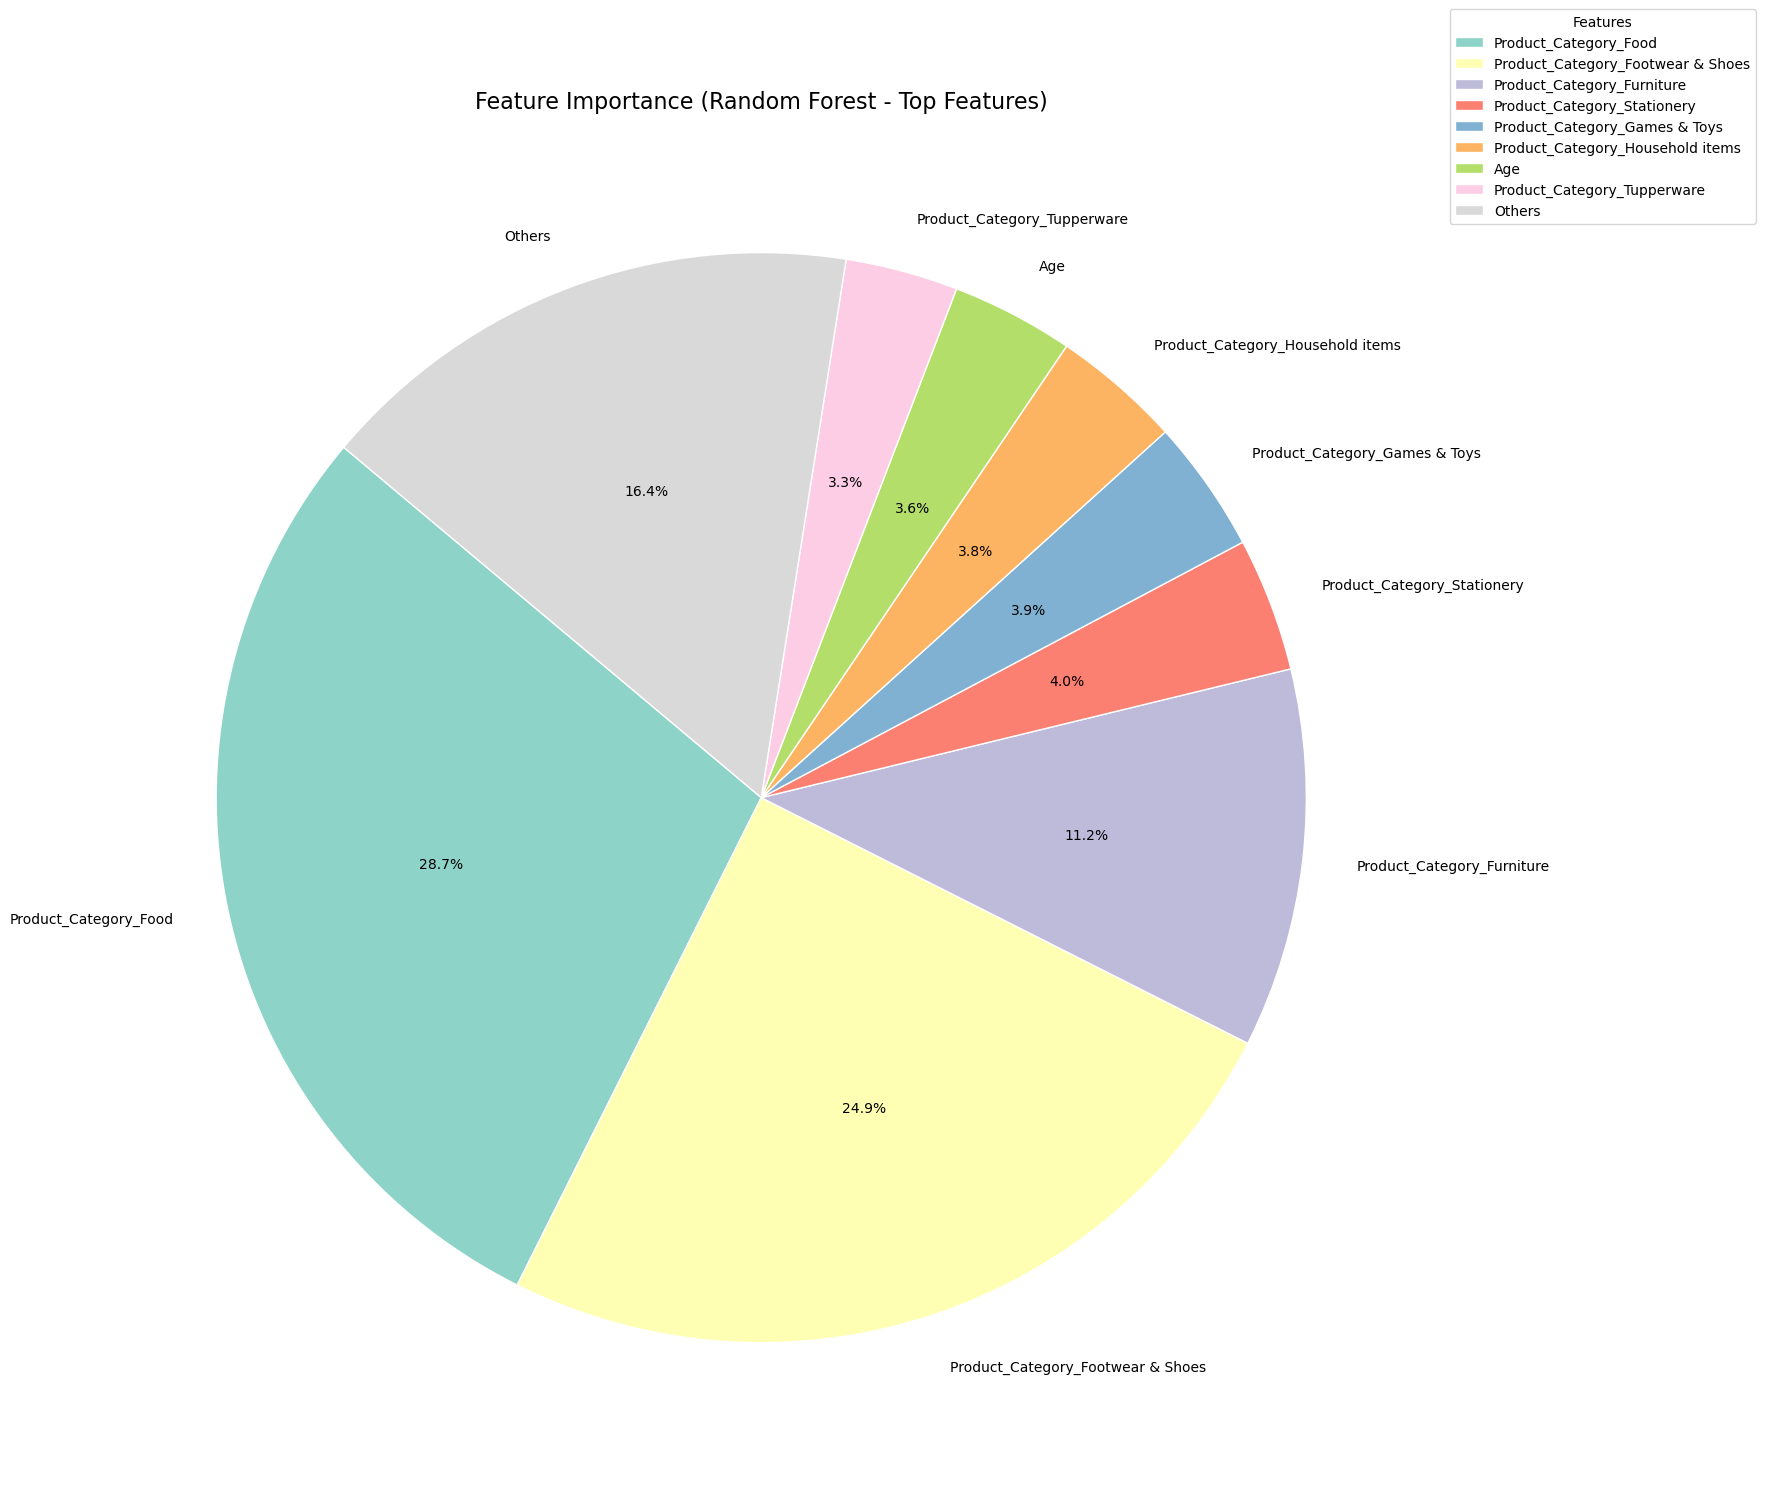

In [69]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = random_forest_model.feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

top_n = 8
top_features = sorted_feature_names[:top_n]
top_importances = sorted_feature_importances[:top_n]

other_importance = np.sum(sorted_feature_importances[top_n:])
top_features = np.append(top_features, 'Others')
top_importances = np.append(top_importances, other_importance)

fig, ax = plt.subplots(figsize=(20, 15))
wedges, texts, autotexts = ax.pie(
    top_importances,
    labels=top_features,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors,
    wedgeprops=dict(edgecolor='w'),
    textprops=dict(color='black')
)

ax.legend(wedges, top_features, title="Features", loc="center left", bbox_to_anchor=(1, 0, 0.5, 2))

plt.title("Feature Importance (Random Forest - Top Features)", fontsize=16)
plt.tight_layout()
plt.show()


Compare predictions and analyze error distributions.

Predicted vs Actual Sales

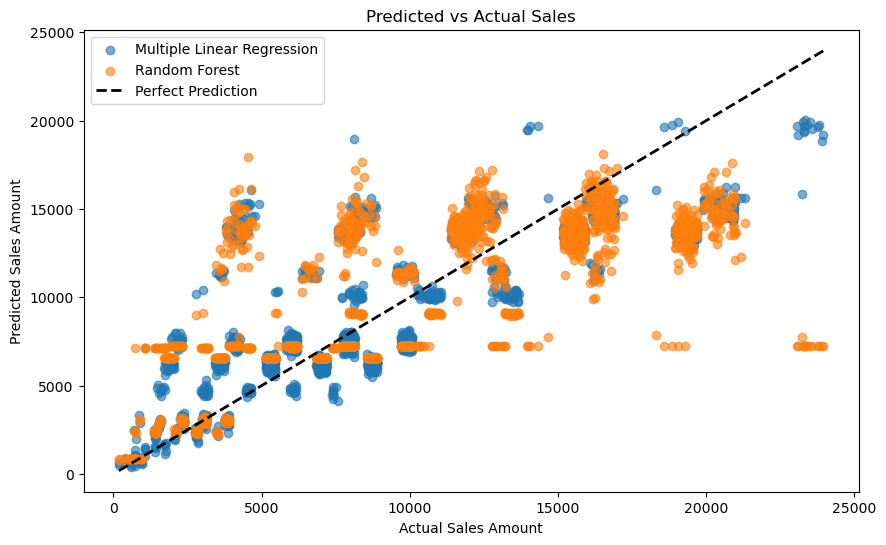

In [71]:
# Predicted vs Actual Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, label="Multiple Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Prediction")
plt.title("Predicted vs Actual Sales")
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.legend()
plt.show()


Error Distribution

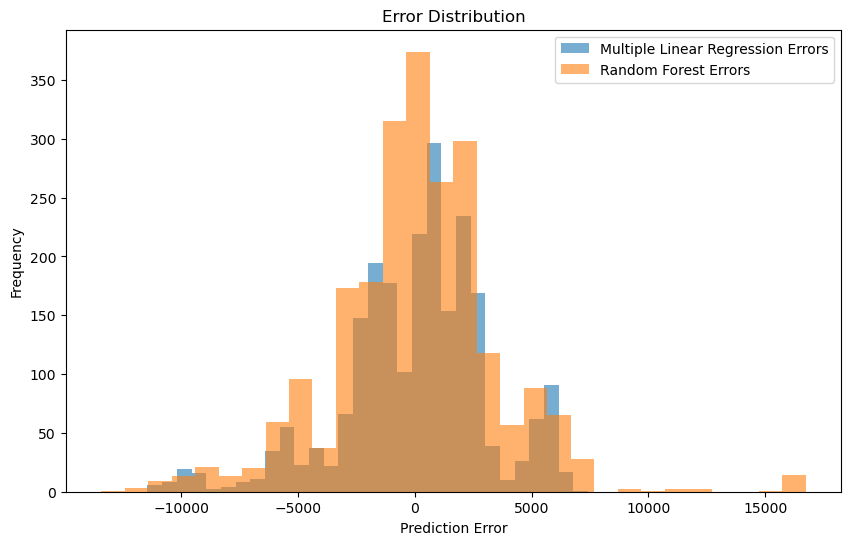

In [73]:
# Error Distribution
errors_linear = y_test - y_pred_linear
errors_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.hist(errors_linear, bins=30, alpha=0.6, label="Multiple Linear Regression Errors")
plt.hist(errors_rf, bins=30, alpha=0.6, label="Random Forest Errors")
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Artificial Neural Network (ANN)

In [75]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [77]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras_tuner import RandomSearch
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  
    model.add(Dense(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        activation=hp.Choice('activation', values=['relu', 'tanh'])
    ))
    model.add(Dense(
        units=hp.Int('hidden_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dense(1))  
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='sales_ann'
)

tuner.search(X_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=32)

# Retrieve best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters for ANN:")
print(f"Units: {best_hps.get('units')}, Hidden Units: {best_hps.get('hidden_units')}, Activation: {best_hps.get('activation')}")

# Train the best ANN model
best_ann_model = tuner.hypermodel.build(best_hps)
history = best_ann_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

# Predictions and evaluation
y_pred_ann = best_ann_model.predict(X_test)
ann_r2 = r2_score(y_test, y_pred_ann)
ann_mae = mean_absolute_error(y_test, y_pred_ann)
ann_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ann))
print("\nANN Performance:")
print(f"R²: {ann_r2:.2f}, MAE: {ann_mae:.2f}, RMSE: {ann_rmse:.2f}")


Reloading Tuner from hyperparameter_tuning\sales_ann\tuner0.json

Best Hyperparameters for ANN:
Units: 128, Hidden Units: 32, Activation: relu
Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 114547696.0000 - mae: 9363.8398 - val_loss: 111356496.0000 - val_mae: 9215.0537
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 103375272.0000 - mae: 8864.9668 - val_loss: 73348376.0000 - val_mae: 7359.6968
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 59263580.0000 - mae: 6496.0332 - val_loss: 26811448.0000 - val_mae: 4233.8726
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21093758.0000 - mae: 3676.6770 - val_loss: 13571757.0000 - val_mae: 2848.2427
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12378348.0000 - mae: 2684.3862 - val_loss: 11566923.0000 - val_mae: 2557.9153
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11365402.0000 - mae: 2516.2053 - val_loss: 11113322.0000 - val_mae: 2485.4109
Epoch 7/50
225/225 ━━━━━━━

Data Visualization

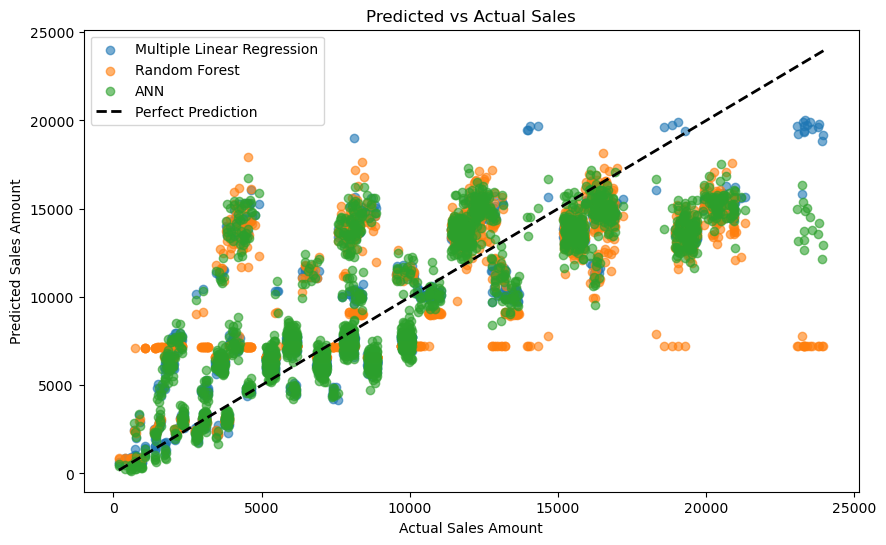

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, label="Multiple Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest")
plt.scatter(y_test, y_pred_ann, alpha=0.6, label="ANN")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Prediction")
plt.title("Predicted vs Actual Sales")
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.legend()
plt.show()


Error Distribution

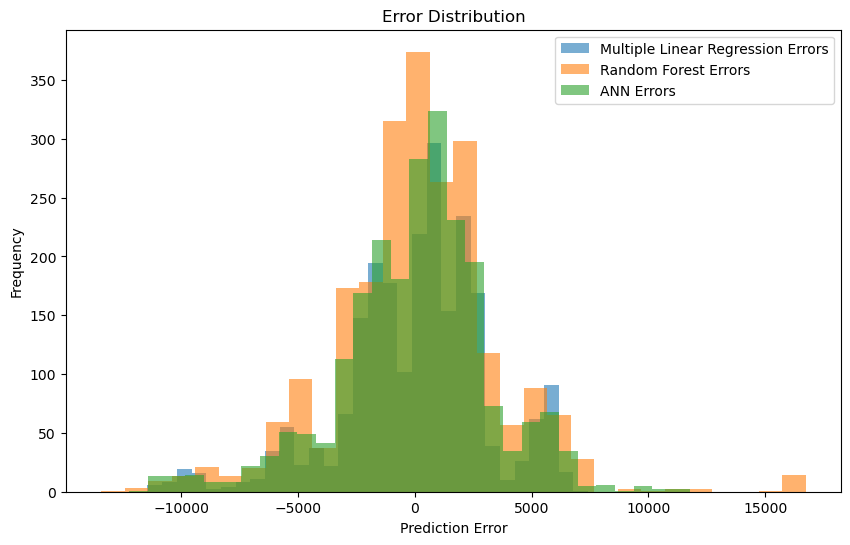

In [81]:
errors_linear = y_test - y_pred_linear
errors_rf = y_test - y_pred_rf
errors_ann = y_test - y_pred_ann.flatten()

plt.figure(figsize=(10, 6))
plt.hist(errors_linear, bins=30, alpha=0.6, label="Multiple Linear Regression Errors")
plt.hist(errors_rf, bins=30, alpha=0.6, label="Random Forest Errors")
plt.hist(errors_ann, bins=30, alpha=0.6, label="ANN Errors")
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Predicted vs Actual Sales

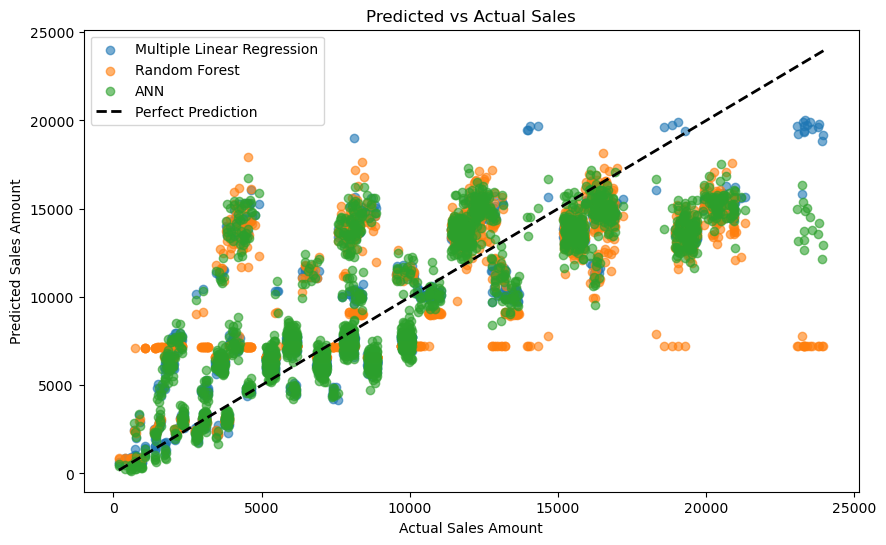

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, label="Multiple Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest")
plt.scatter(y_test, y_pred_ann, alpha=0.6, label="ANN")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Prediction")
plt.title("Predicted vs Actual Sales")
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.legend()
plt.show()


Compare Performance


Performance Comparison Across Models:
                        Model  R² (Explained Variance)  \
0  Multiple Linear Regression                 0.646020   
1               Random Forest                 0.544182   
2                         ANN                 0.620257   

   MAE (Mean Absolute Error)  RMSE (Root Mean Squared Error)  
0                2369.500796                     3134.182708  
1                2597.292585                     3556.563820  
2                2418.562141                     3246.233842  


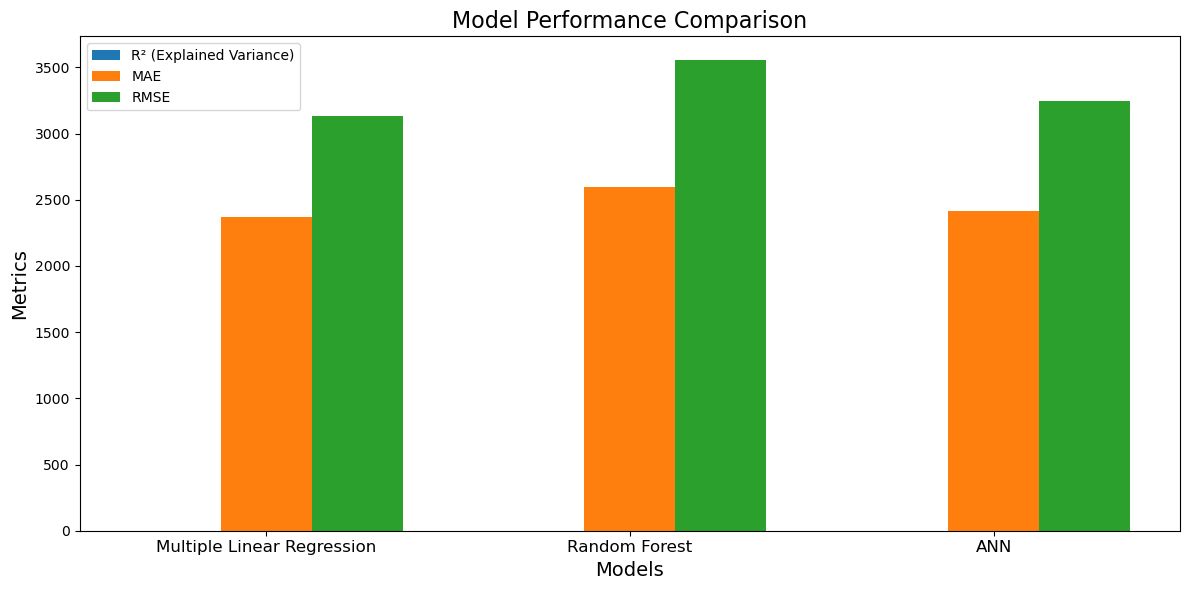

In [85]:
metrics = {
    "Model": ["Multiple Linear Regression", "Random Forest", "ANN"],
    "R² (Explained Variance)": [linear_r2, rf_r2, ann_r2],
    "MAE (Mean Absolute Error)": [linear_mae, rf_mae, ann_mae],
    "RMSE (Root Mean Squared Error)": [linear_rmse, rf_rmse, ann_rmse]
}

metrics_df = pd.DataFrame(metrics)

print("\nPerformance Comparison Across Models:")
print(metrics_df)

plt.figure(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(metrics_df))

plt.bar(index, metrics_df["R² (Explained Variance)"], bar_width, label='R² (Explained Variance)')
plt.bar(index + bar_width, metrics_df["MAE (Mean Absolute Error)"], bar_width, label='MAE')
plt.bar(index + 2 * bar_width, metrics_df["RMSE (Root Mean Squared Error)"], bar_width, label='RMSE')

# Add labels and title
plt.xlabel("Models", fontsize=14)
plt.ylabel("Metrics", fontsize=14)
plt.title("Model Performance Comparison", fontsize=16)
plt.xticks(index + bar_width, metrics_df["Model"], fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


Performance Summary

In [87]:
metrics = {
    "Model": ["Multiple Linear Regression", "Random Forest", "ANN"],
    "R²": [linear_r2, rf_r2, ann_r2],
    "MAE": [linear_mae, rf_mae, ann_mae],
    "RMSE": [linear_rmse, rf_rmse, ann_rmse]
}

metrics_df = pd.DataFrame(metrics)
print("\nModel Comparison:")
print(metrics_df)



Model Comparison:
                        Model        R²          MAE         RMSE
0  Multiple Linear Regression  0.646020  2369.500796  3134.182708
1               Random Forest  0.544182  2597.292585  3556.563820
2                         ANN  0.620257  2418.562141  3246.233842


Statistical Tests and Visualizations

In [89]:
# Performance metrics
mae_values = [linear_mae, rf_mae, ann_mae]
rmse_values = [linear_rmse, rf_rmse, ann_rmse]
models = ['Multiple Linear Regression', 'Random Forest', 'ANN']

# Rank models by MAE
mae_rank = sorted(zip(models, mae_values), key=lambda x: x[1])
print("\nMAE Ranking (Best to Worst):", mae_rank)

# Rank models by RMSE
rmse_rank = sorted(zip(models, rmse_values), key=lambda x: x[1])
print("RMSE Ranking (Best to Worst):", rmse_rank)


MAE Ranking (Best to Worst): [('Multiple Linear Regression', 2369.5007960257785), ('ANN', 2418.5621408388806), ('Random Forest', 2597.292584840926)]
RMSE Ranking (Best to Worst): [('Multiple Linear Regression', 3134.182707573889), ('ANN', 3246.233841599143), ('Random Forest', 3556.563819652656)]


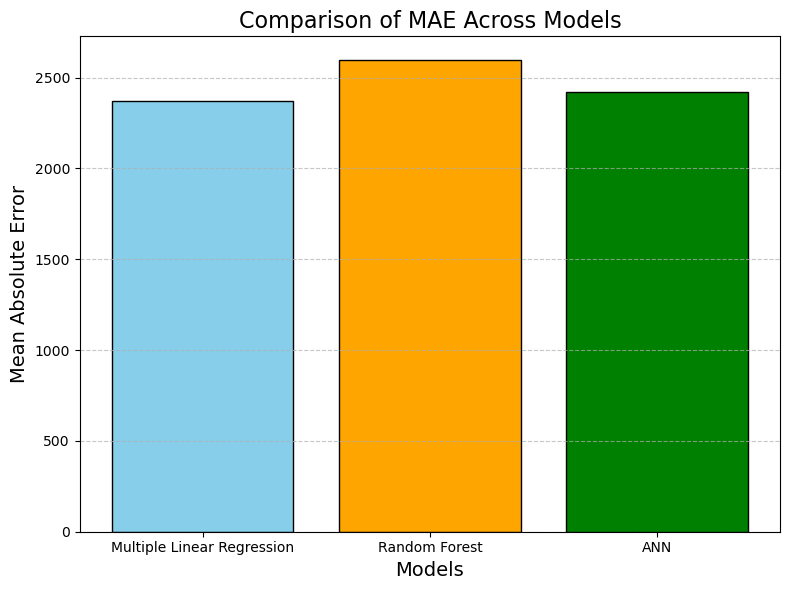

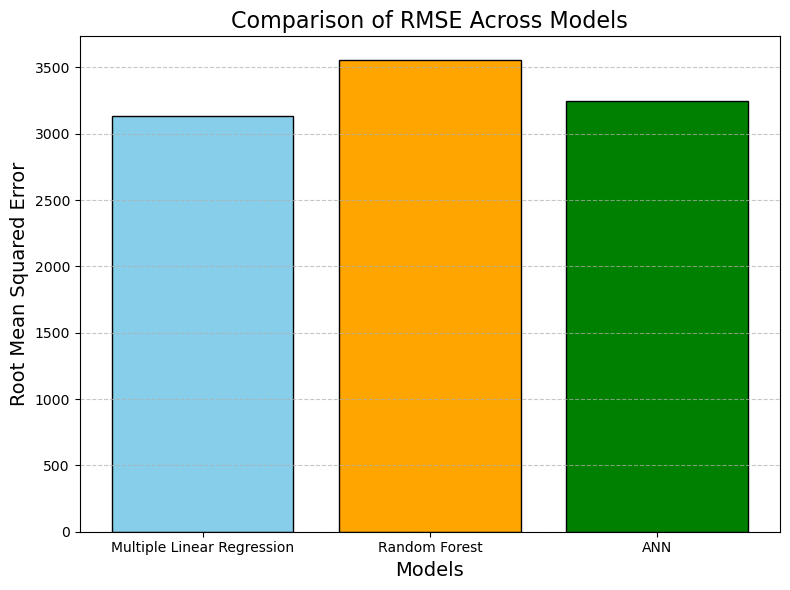

In [91]:
#Bar Chart for Direct Comparison

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['skyblue', 'orange', 'green'], edgecolor='k')
plt.title("Comparison of MAE Across Models", fontsize=16)
plt.ylabel("Mean Absolute Error", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['skyblue', 'orange', 'green'], edgecolor='k')
plt.title("Comparison of RMSE Across Models", fontsize=16)
plt.ylabel("Root Mean Squared Error", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


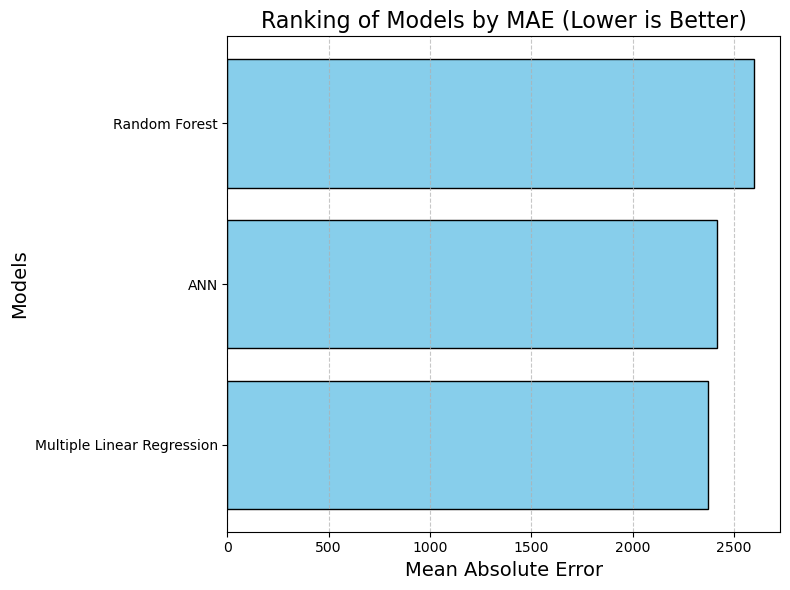

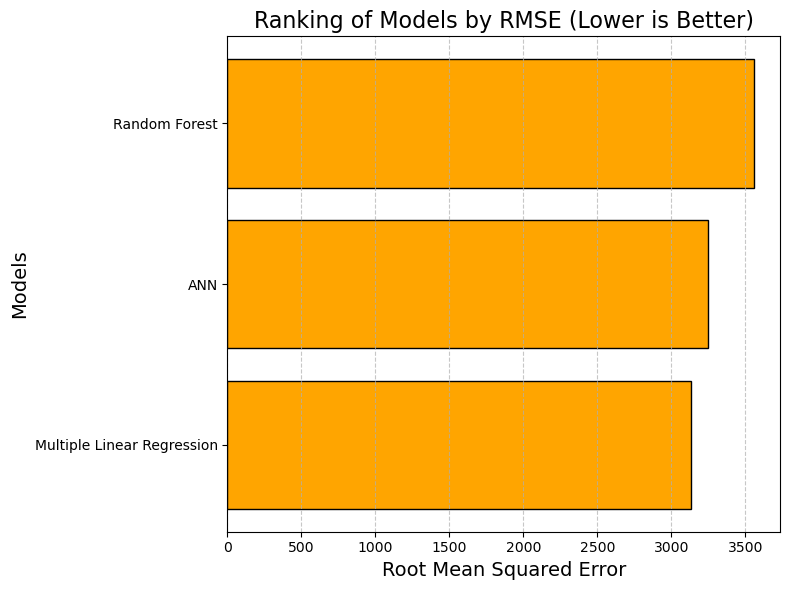

In [93]:
# Sort MAE and RMSE values for horizontal bar chart

sorted_mae_models, sorted_mae_values = zip(*mae_rank)
sorted_rmse_models, sorted_rmse_values = zip(*rmse_rank)

plt.figure(figsize=(8, 6))
plt.barh(sorted_mae_models, sorted_mae_values, color='skyblue', edgecolor='k')
plt.title("Ranking of Models by MAE (Lower is Better)", fontsize=16)
plt.xlabel("Mean Absolute Error", fontsize=14)
plt.ylabel("Models", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.barh(sorted_rmse_models, sorted_rmse_values, color='orange', edgecolor='k')
plt.title("Ranking of Models by RMSE (Lower is Better)", fontsize=16)
plt.xlabel("Root Mean Squared Error", fontsize=14)
plt.ylabel("Models", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Hypothesis: 99% Accuracy Test

In [95]:
import numpy as np
import scipy.stats as stats

# Define function to calculate confidence intervals
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = stats.sem(data)  
    margin = se * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin, mean + margin

r2_values = [linear_r2, rf_r2, ann_r2]
ci_lower, ci_upper = confidence_interval(r2_values, confidence=0.95)

print("\n95% Confidence Interval for R²:")
print(f"Lower Bound: {ci_lower:.4f}, Upper Bound: {ci_upper:.4f}")

if ci_lower >= 0.99:
    print("The models can achieve at least 99% accuracy (R² ≥ 0.99).")
else:
    print("The models do not achieve at least 99% accuracy (R² ≥ 0.99).")



95% Confidence Interval for R²:
Lower Bound: 0.4720, Upper Bound: 0.7350
The models do not achieve at least 99% accuracy (R² ≥ 0.99).


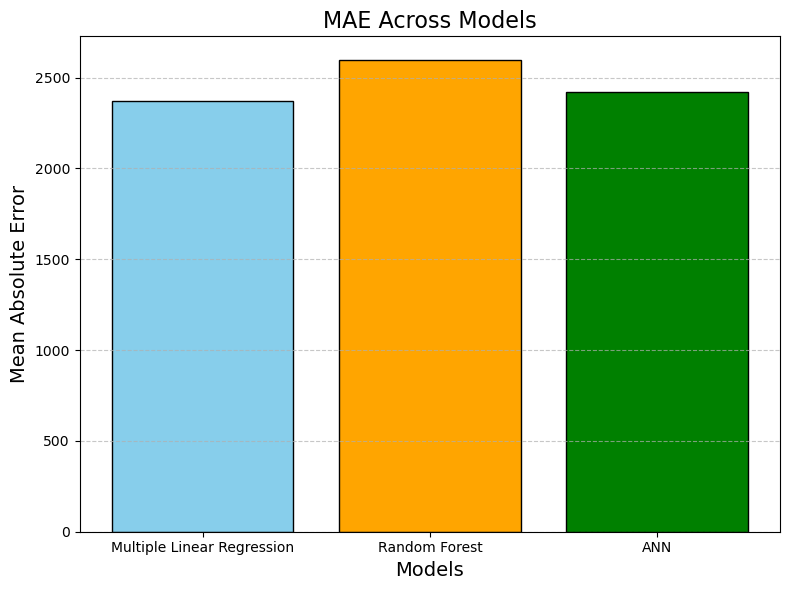

In [97]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Multiple Linear Regression', 'Random Forest', 'ANN']
mae_values = [linear_mae, rf_mae, ann_mae]
rmse_values = [linear_rmse, rf_rmse, ann_rmse]

plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['skyblue', 'orange', 'green'], edgecolor='k')
plt.title("MAE Across Models", fontsize=16)
plt.ylabel("Mean Absolute Error", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



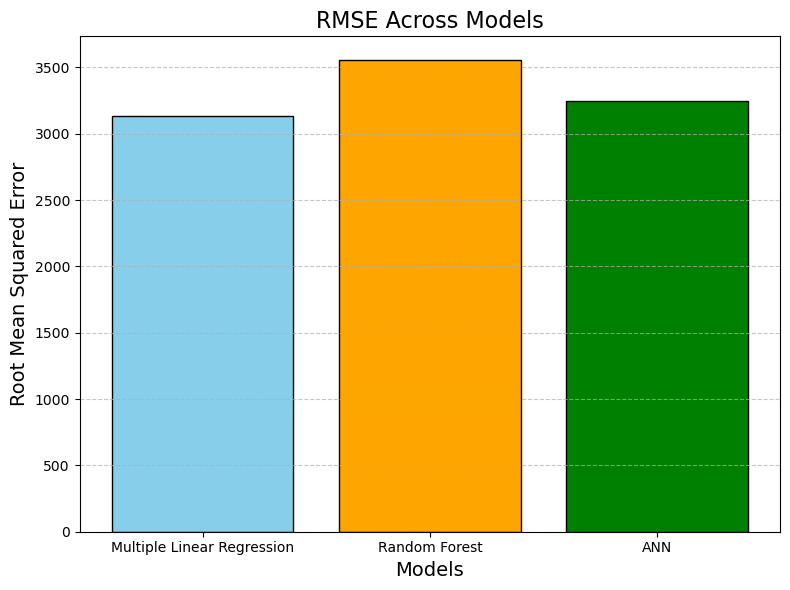

In [99]:
plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['skyblue', 'orange', 'green'], edgecolor='k')
plt.title("RMSE Across Models", fontsize=16)
plt.ylabel("Root Mean Squared Error", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


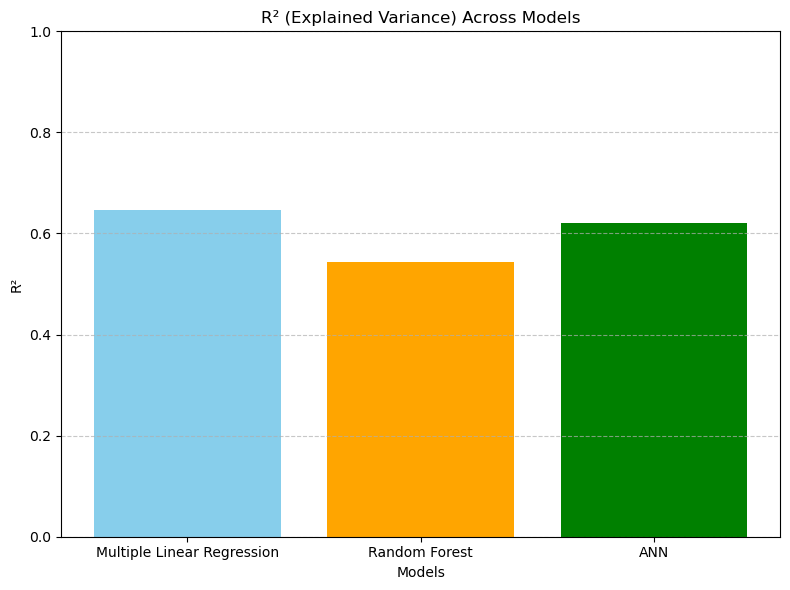

In [109]:
# Bar chart for R² (Explained Variance) Across Models

plt.figure(figsize=(8, 6))
plt.bar(metrics_df['Model'], metrics_df['R²'], color=['skyblue', 'orange', 'green'])
plt.title("R² (Explained Variance) Across Models")
plt.ylabel("R²")
plt.xlabel("Models")
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



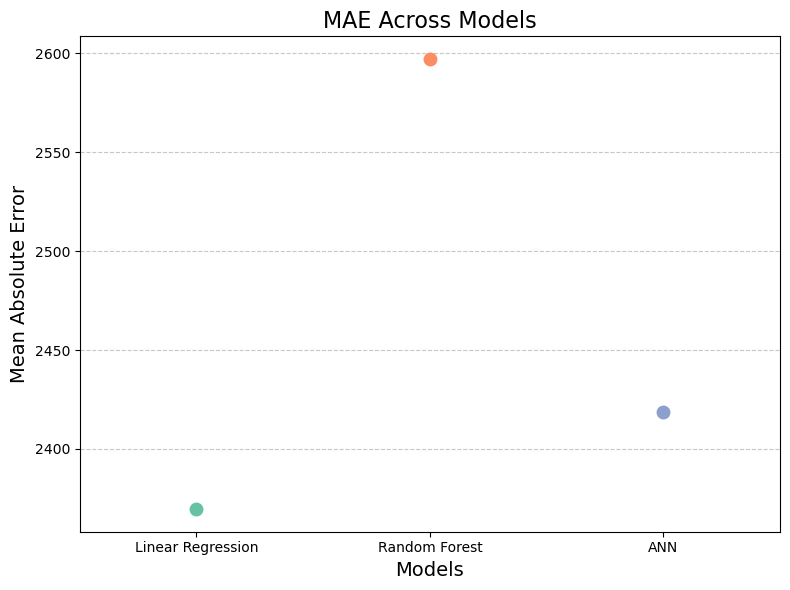

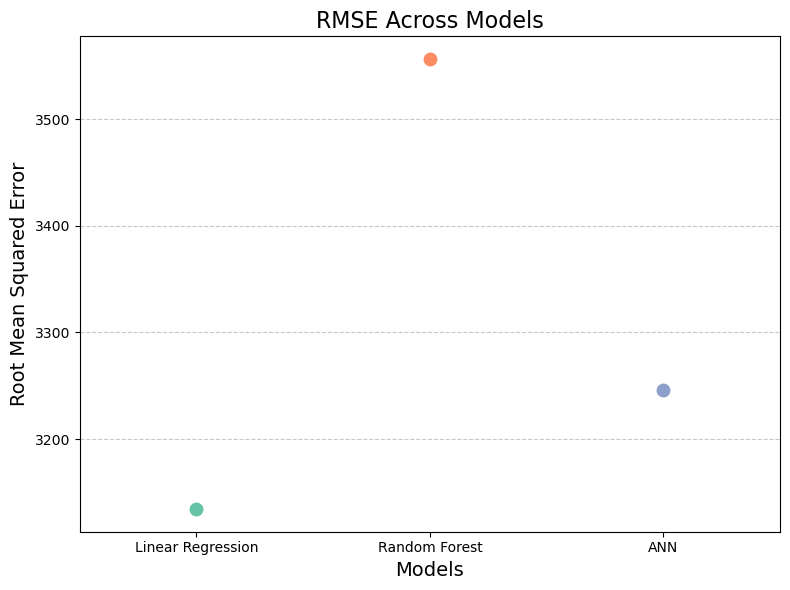

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

performance_data = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'ANN'],
    'MAE': [linear_mae, rf_mae, ann_mae],
    'RMSE': [linear_rmse, rf_rmse, ann_rmse]
})

plt.figure(figsize=(8, 6))
sns.stripplot(data=performance_data, x='Model', y='MAE', hue='Model', palette='Set2', size=10, legend=False)
plt.title("MAE Across Models", fontsize=16)
plt.ylabel("Mean Absolute Error", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.stripplot(data=performance_data, x='Model', y='RMSE', hue='Model', palette='Set2', size=10, legend=False)
plt.title("RMSE Across Models", fontsize=16)
plt.ylabel("Root Mean Squared Error", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


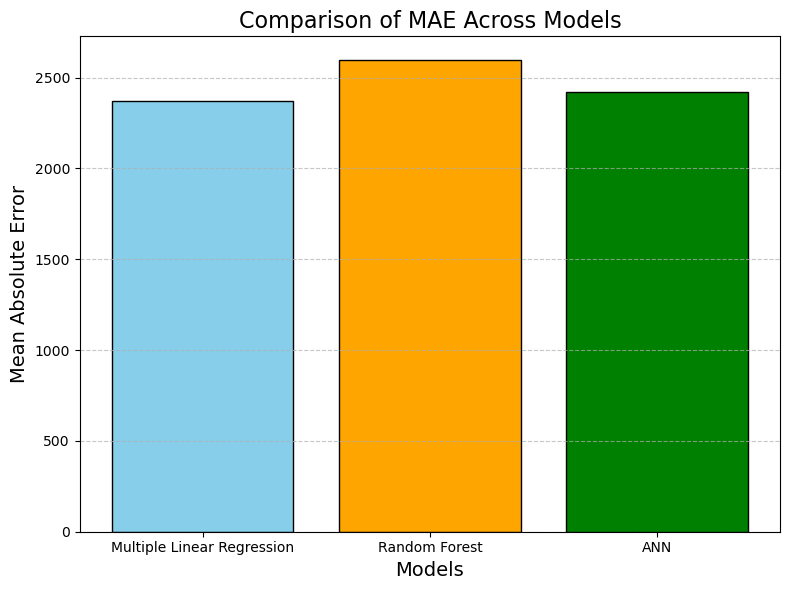

In [113]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['skyblue', 'orange', 'green'], edgecolor='k')
plt.title("Comparison of MAE Across Models", fontsize=16)
plt.ylabel("Mean Absolute Error", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


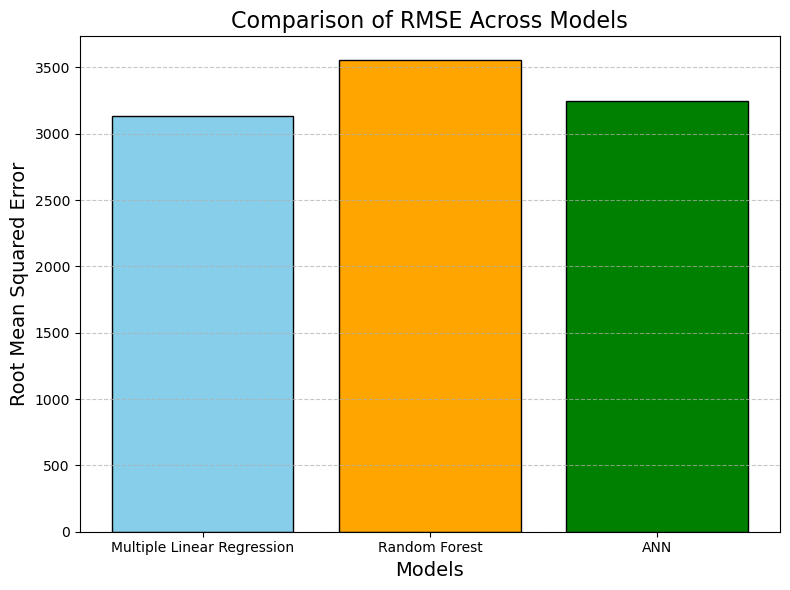

In [115]:

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['skyblue', 'orange', 'green'], edgecolor='k')
plt.title("Comparison of RMSE Across Models", fontsize=16)
plt.ylabel("Root Mean Squared Error", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
